In [1]:
from load_modules import *
import copy



In [2]:
np.arange(0.1,1,0.05), np.concatenate((np.linspace(0.99,0.89,11), .98 - np.logspace(-1,-0.31876,10)))

(array([0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55, 0.6 ,
        0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95]),
 array([0.99      , 0.98      , 0.97      , 0.96      , 0.95      ,
        0.94      , 0.93      , 0.92      , 0.91      , 0.9       ,
        0.89      , 0.88      , 0.86095989, 0.83829451, 0.81131363,
        0.77919555, 0.74096215, 0.69544908, 0.64127026, 0.57677573,
        0.50000137]))

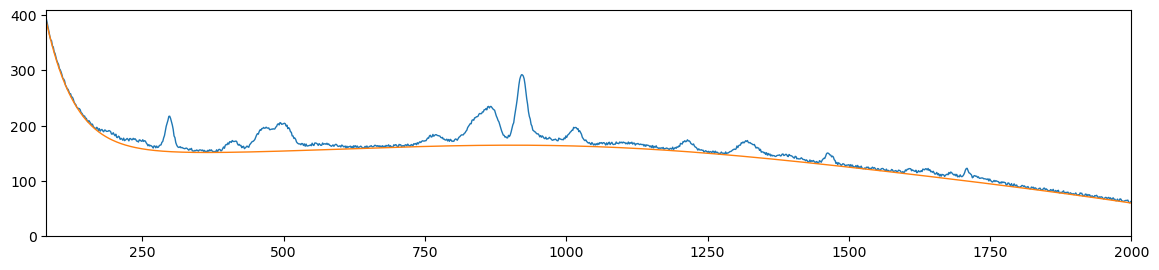

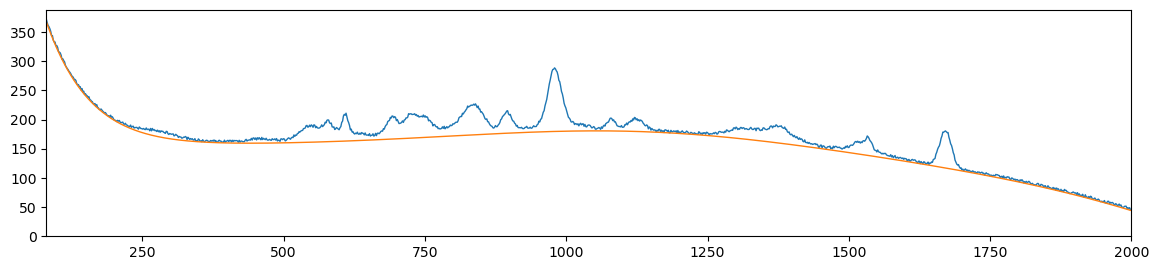

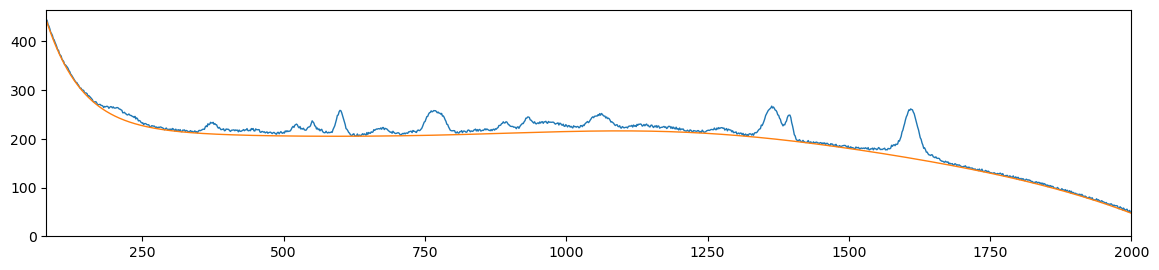

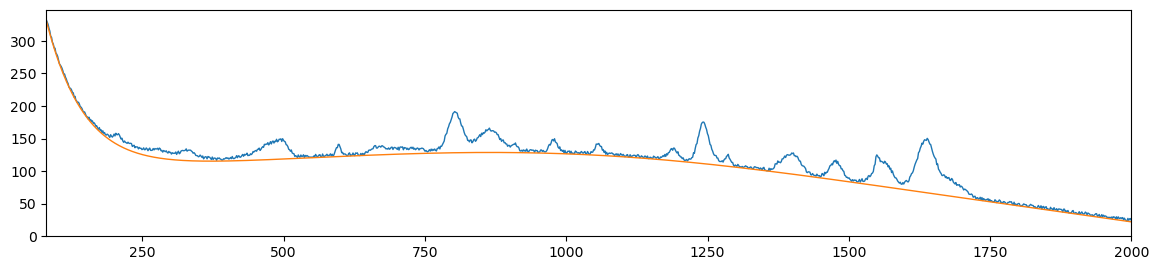

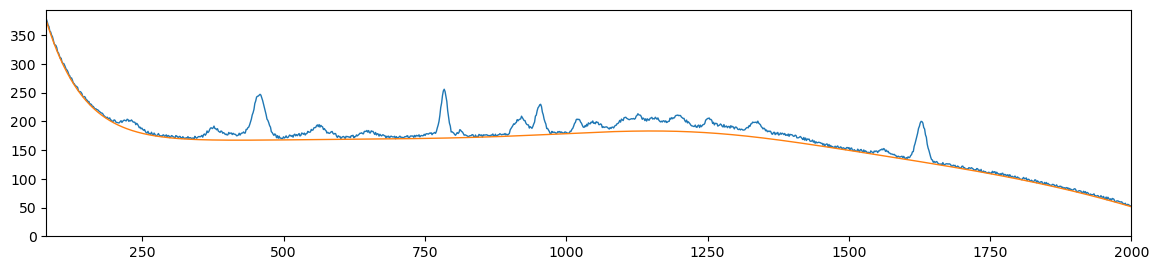

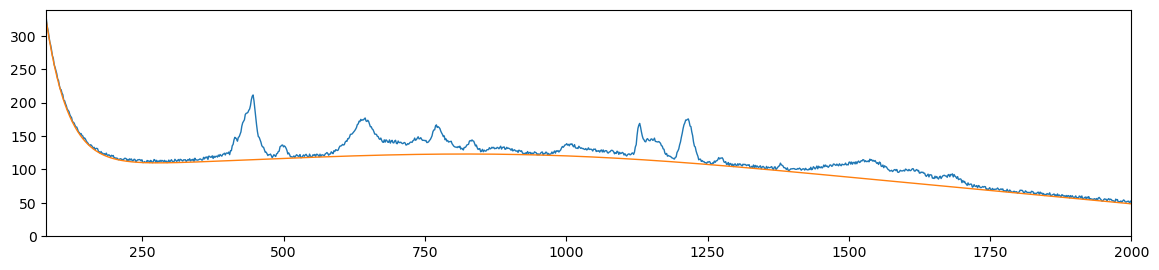

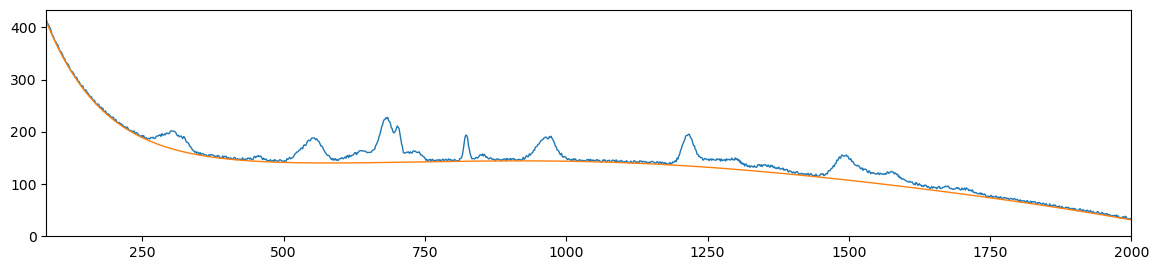

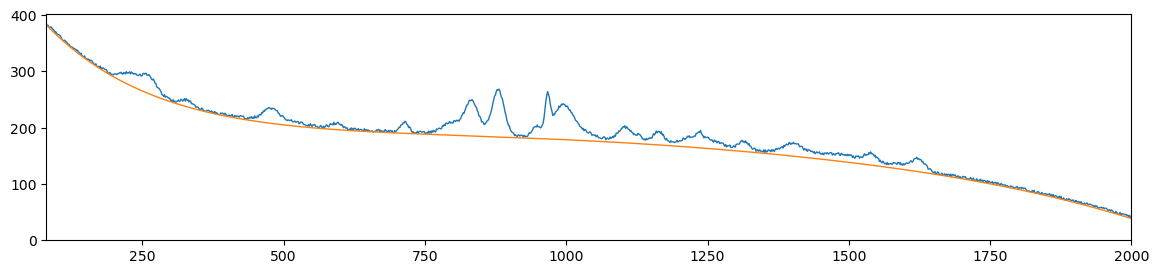

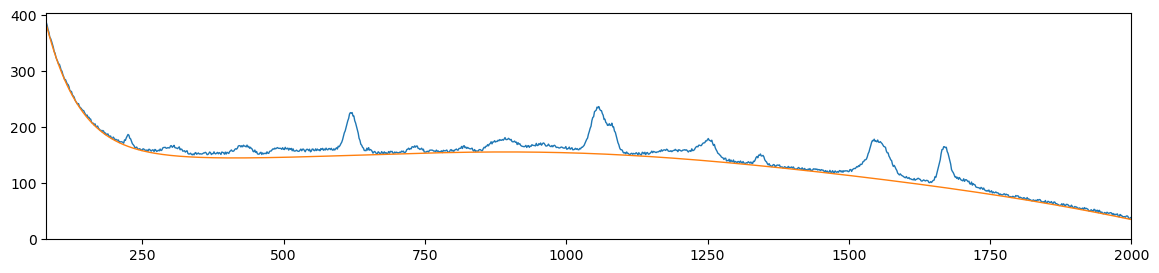

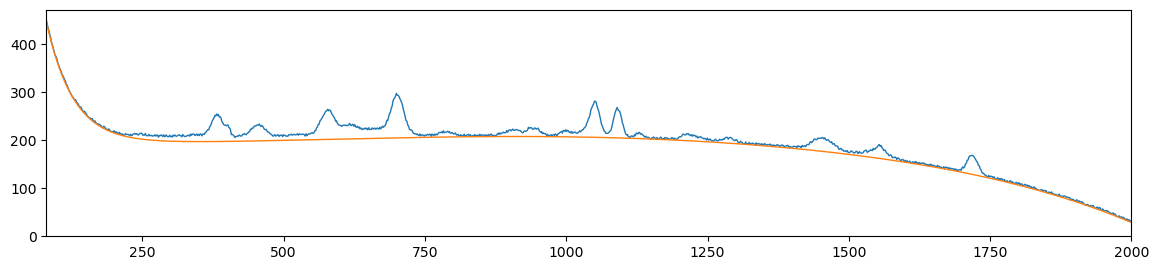

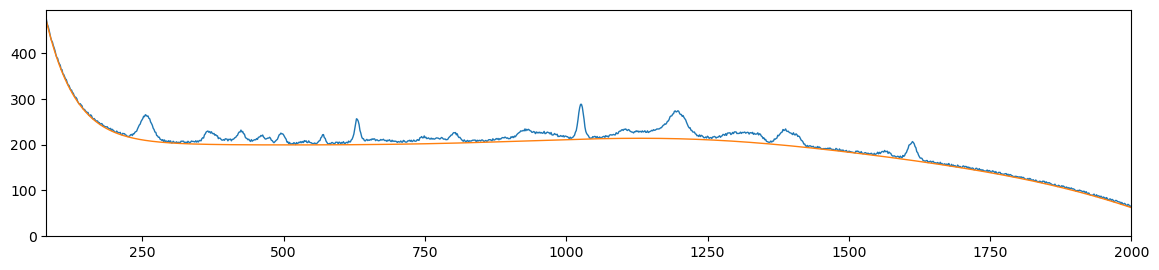

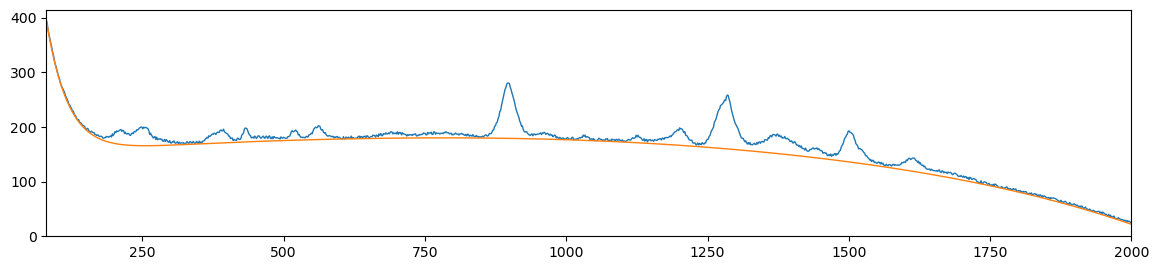

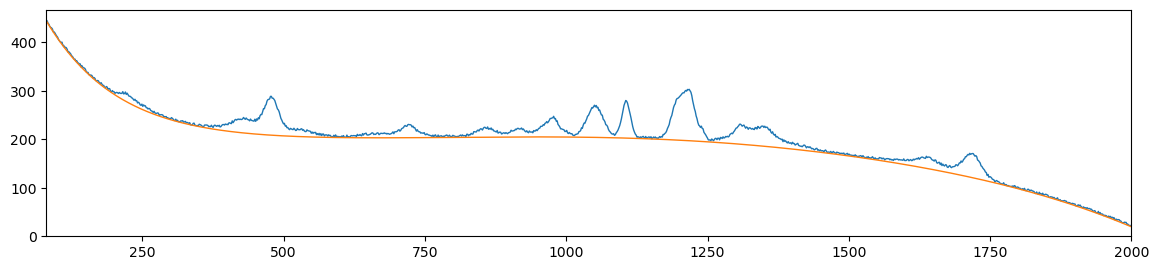

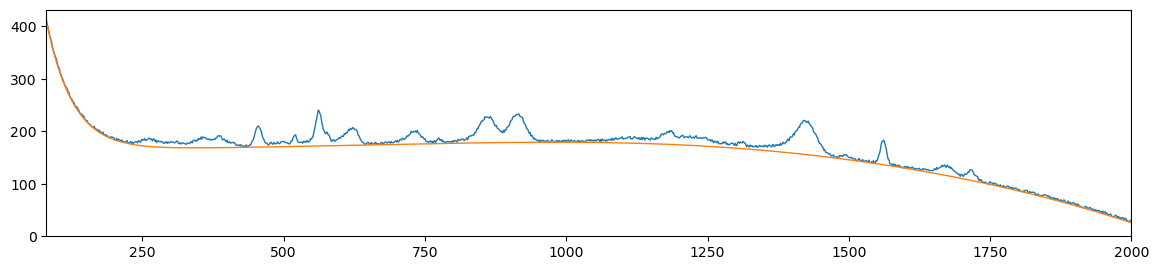

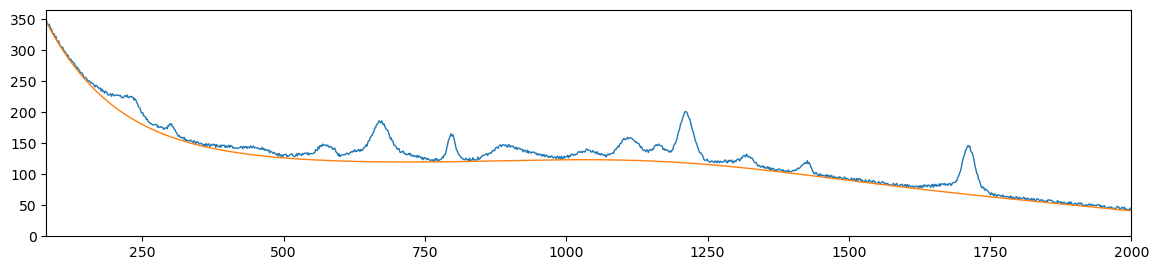

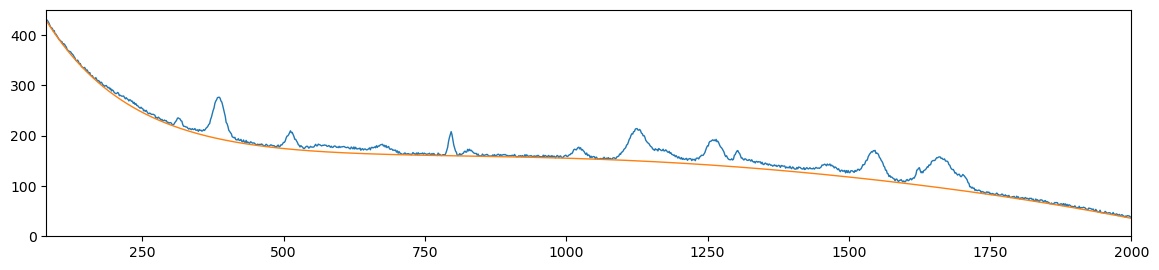

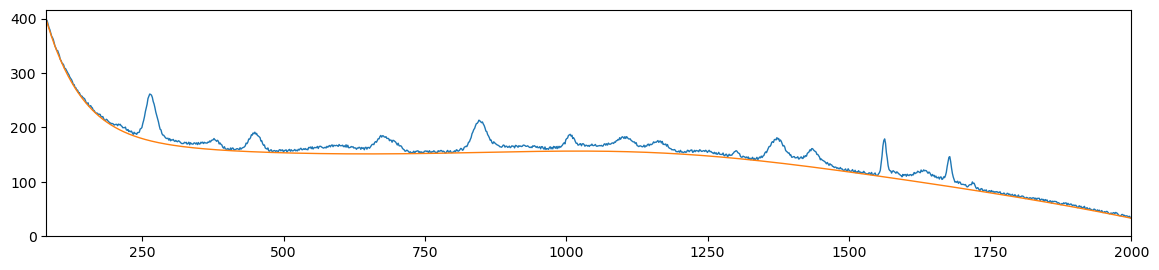

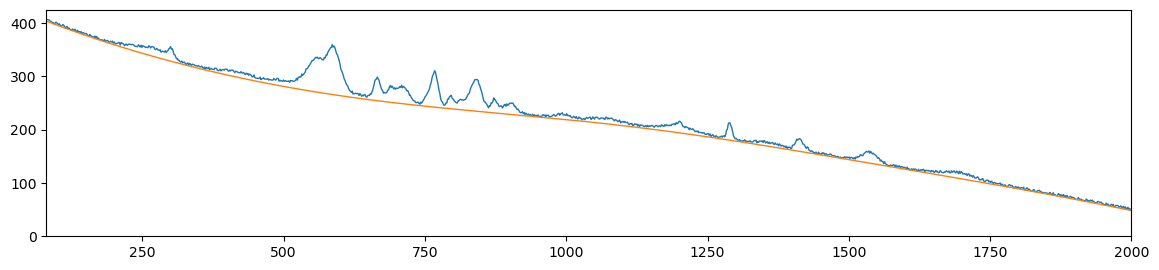

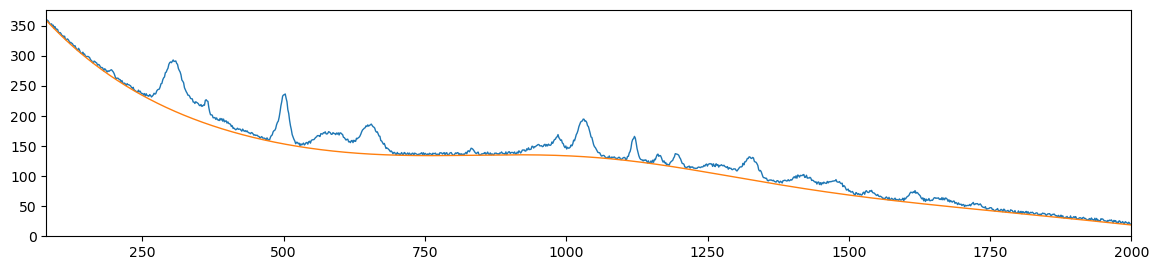

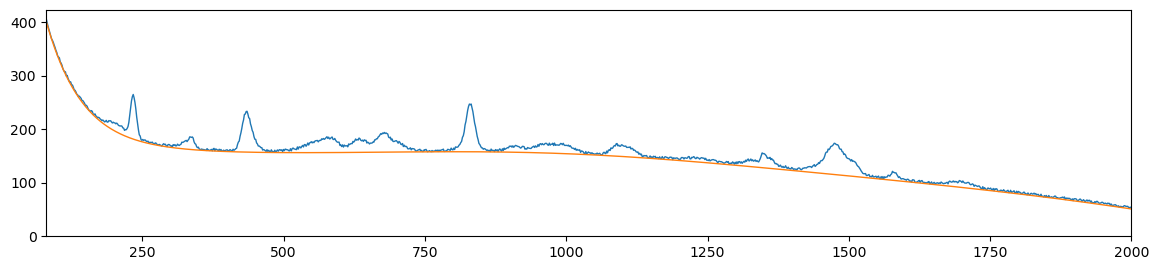

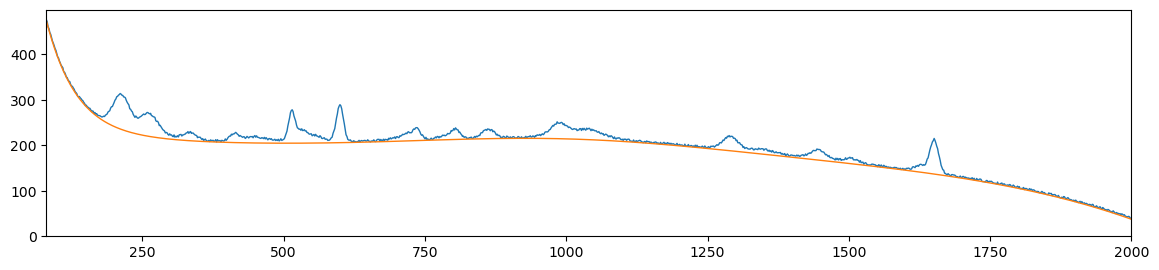

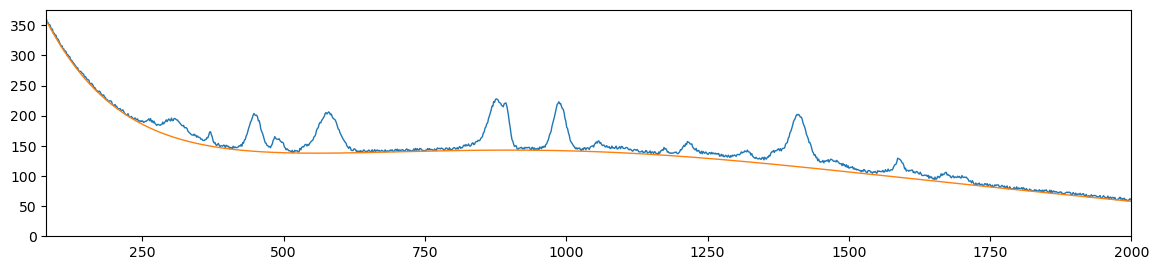

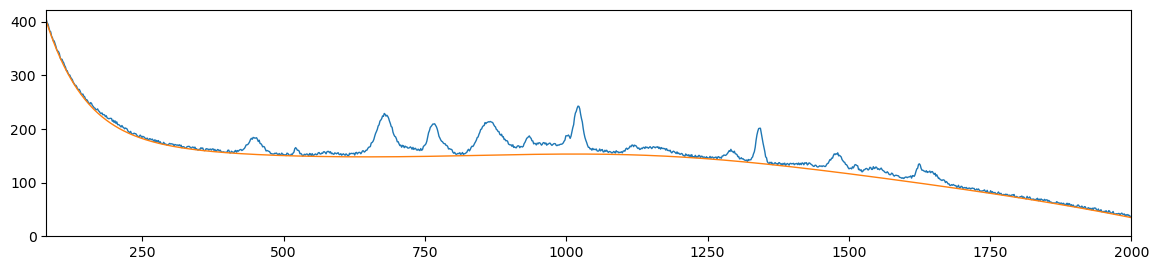

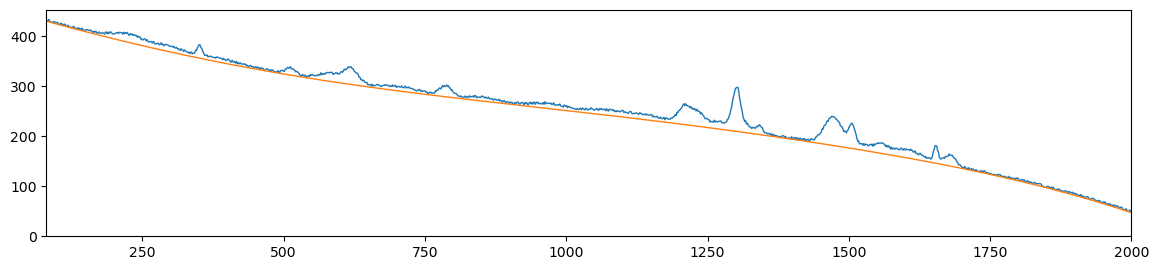

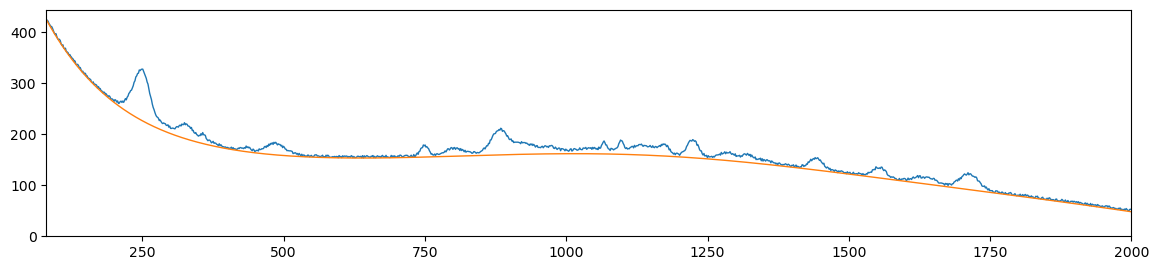

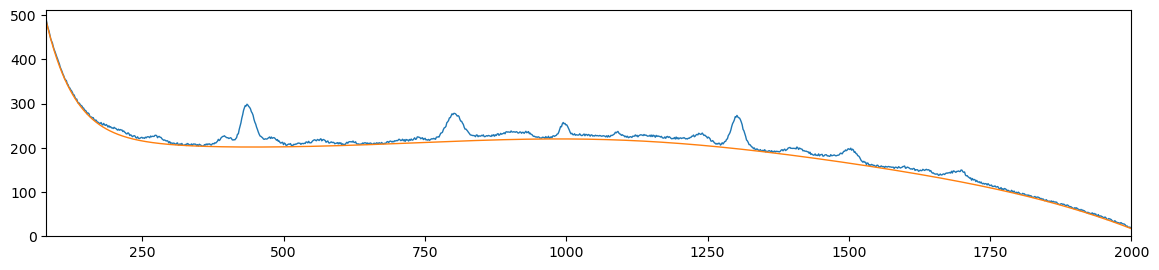

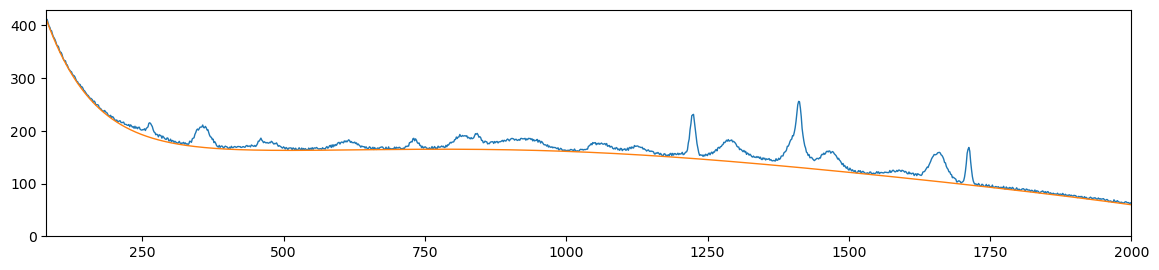

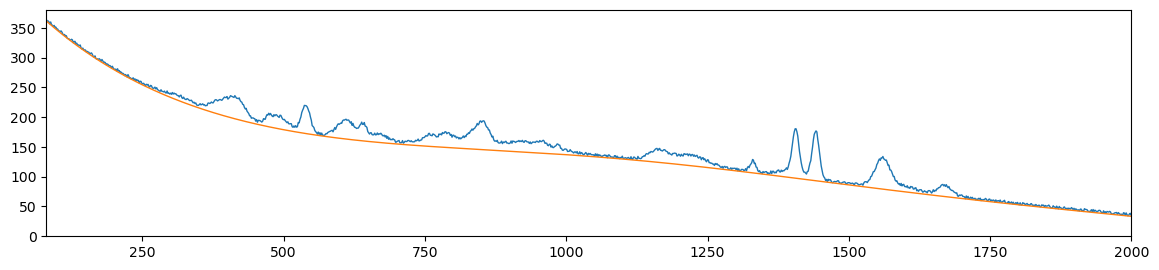

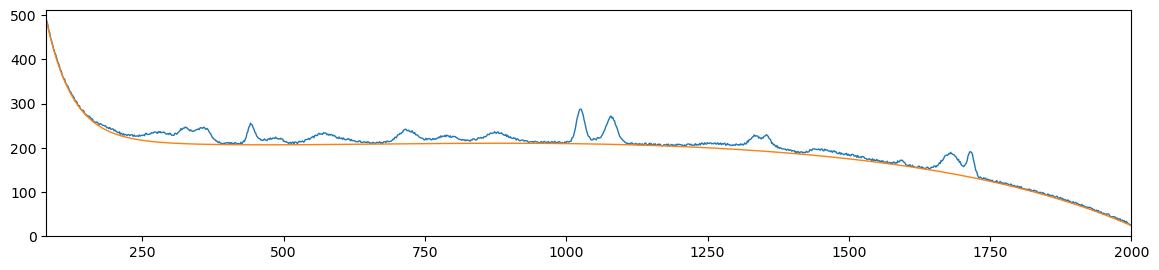

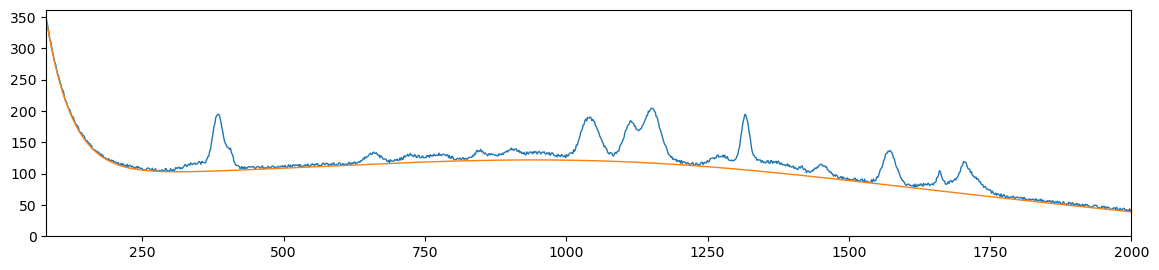

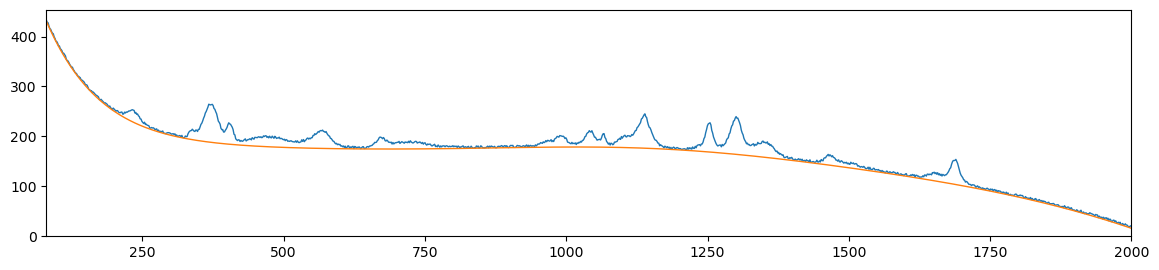

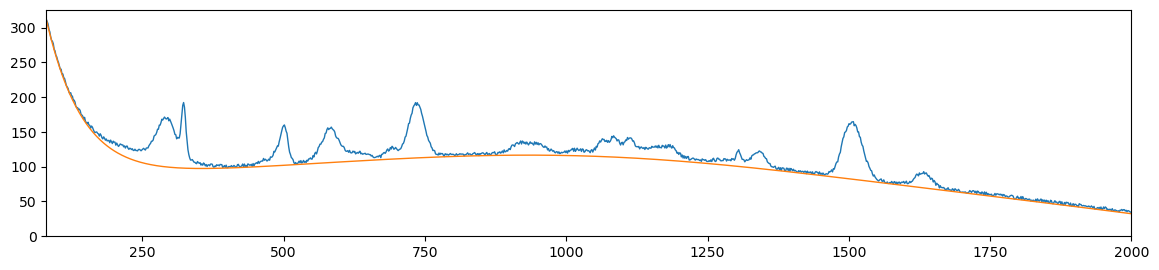

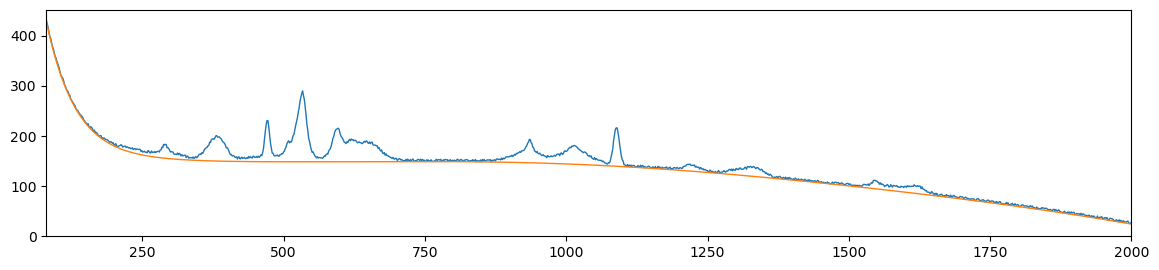

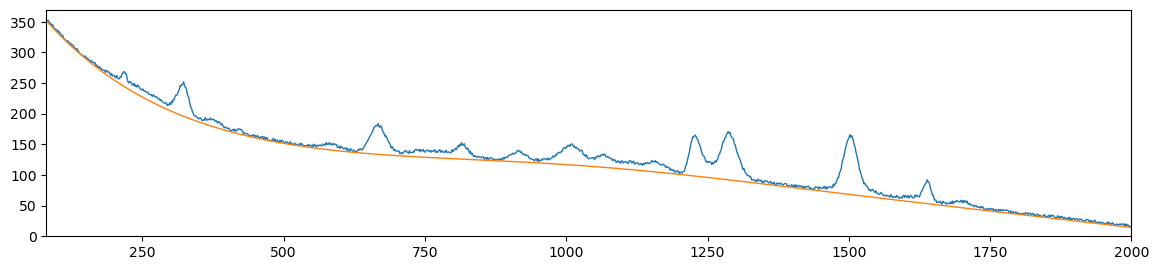

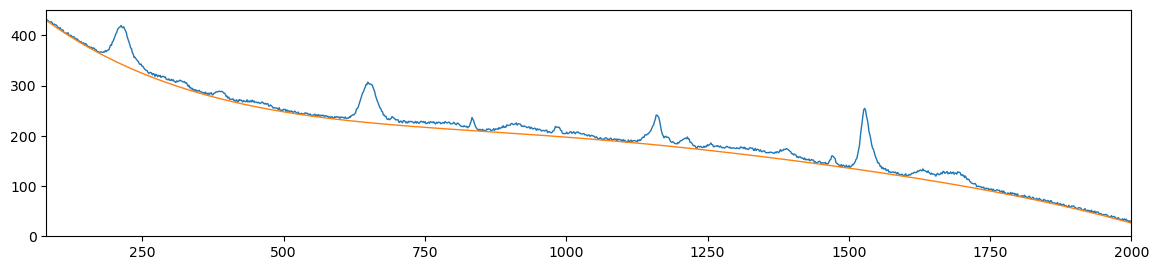

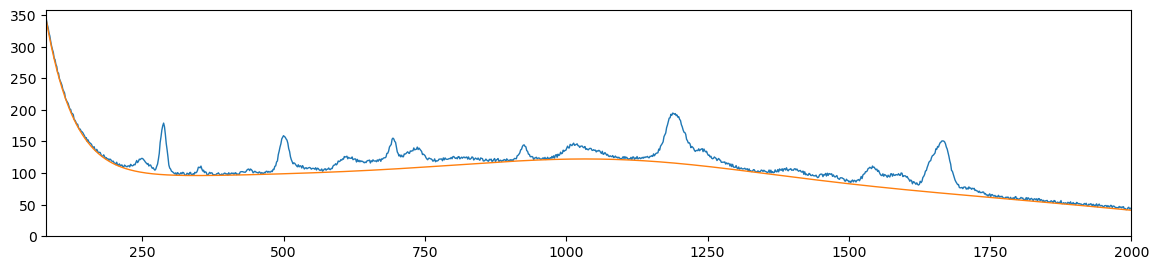

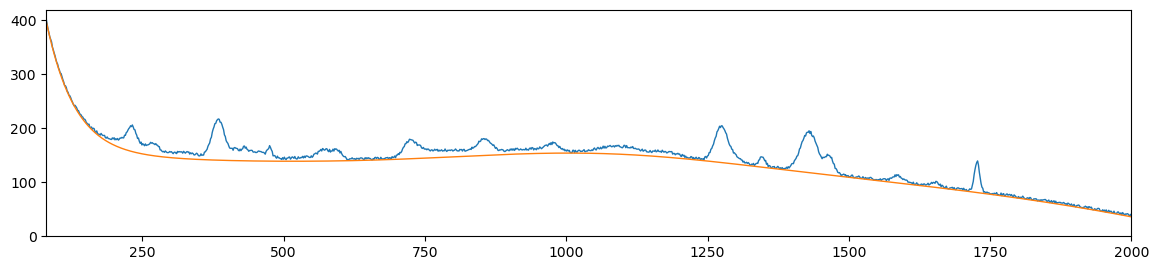

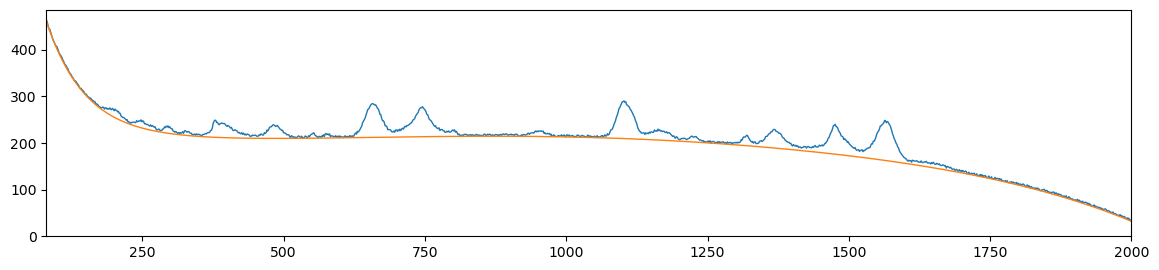

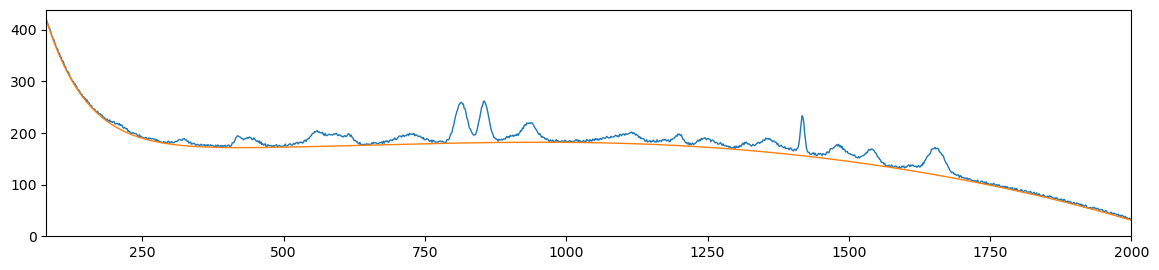

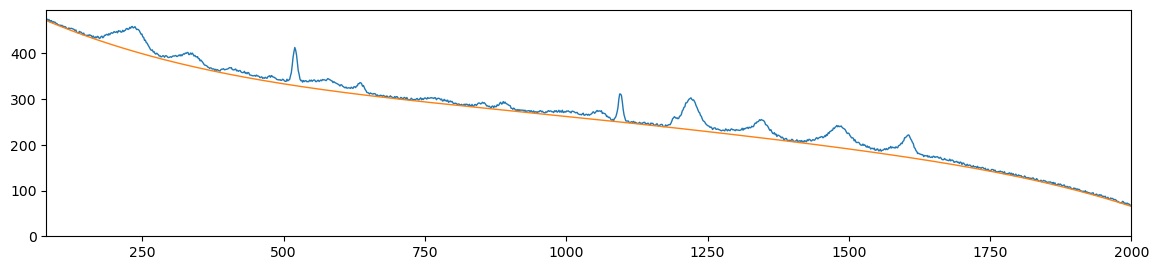

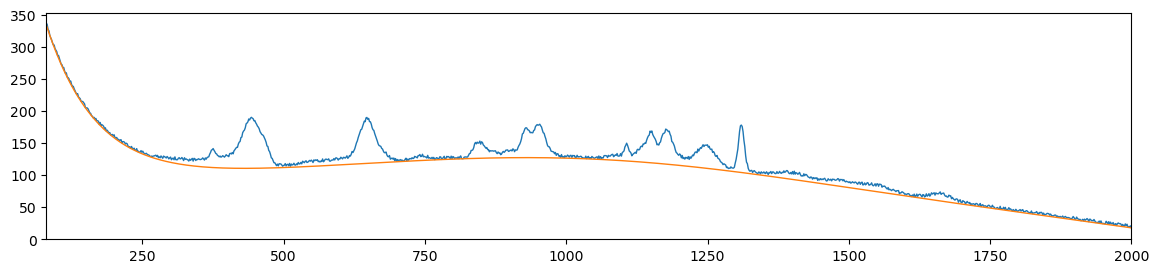

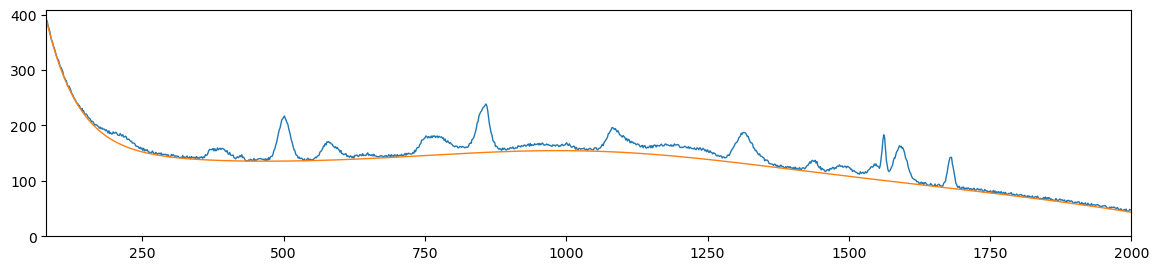

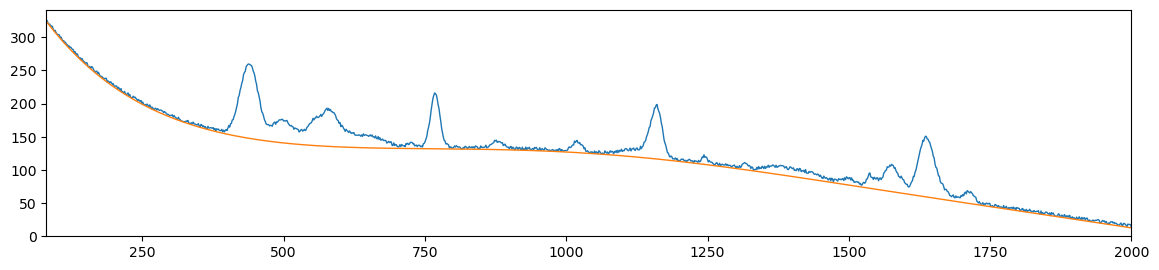

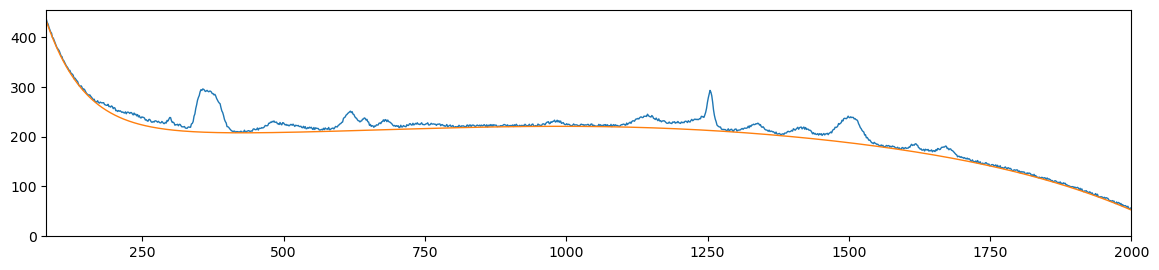

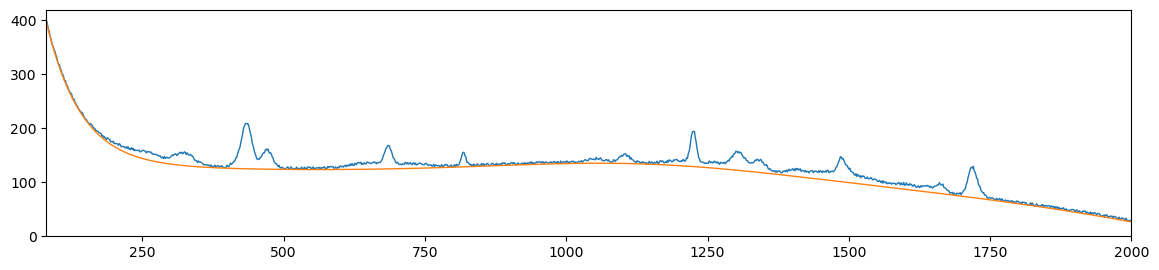

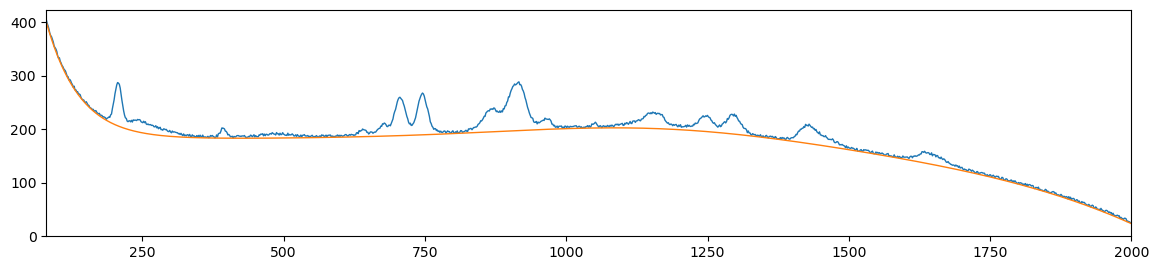

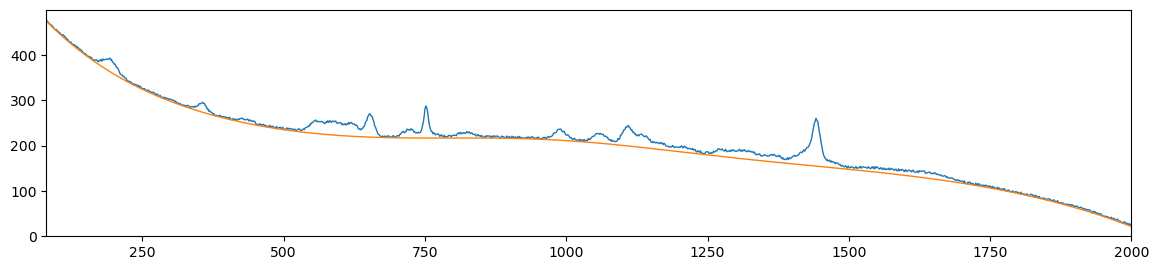

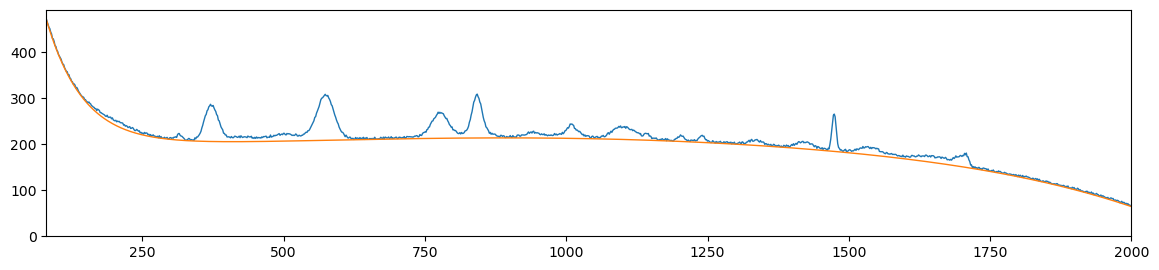

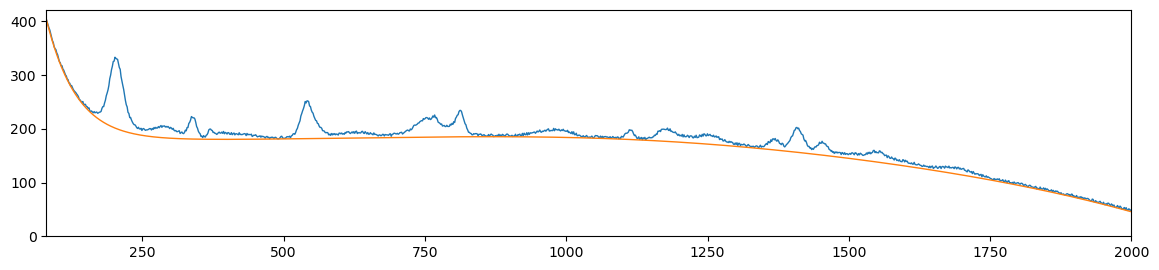

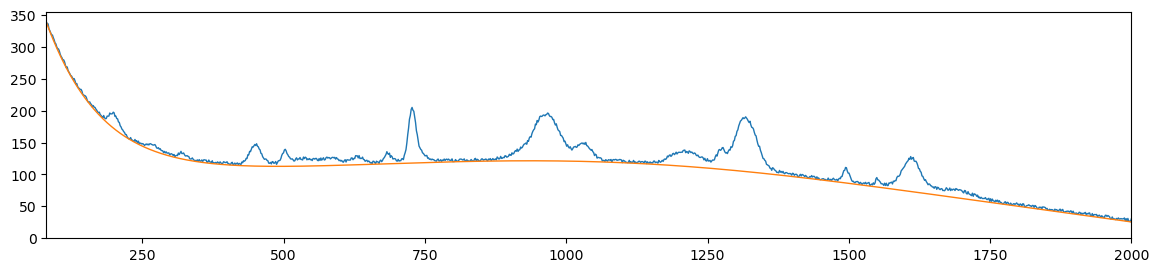

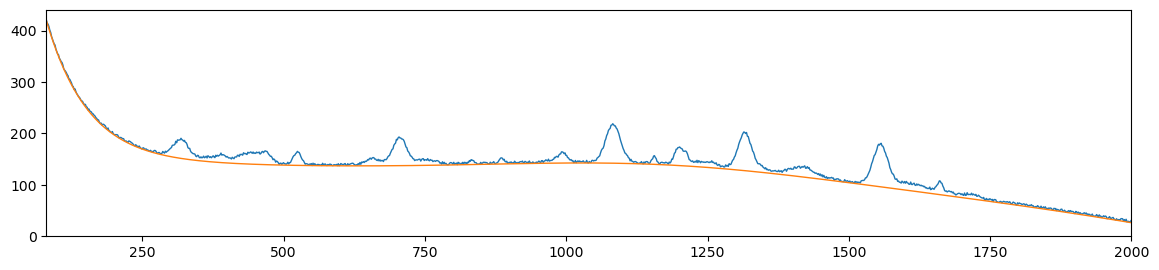

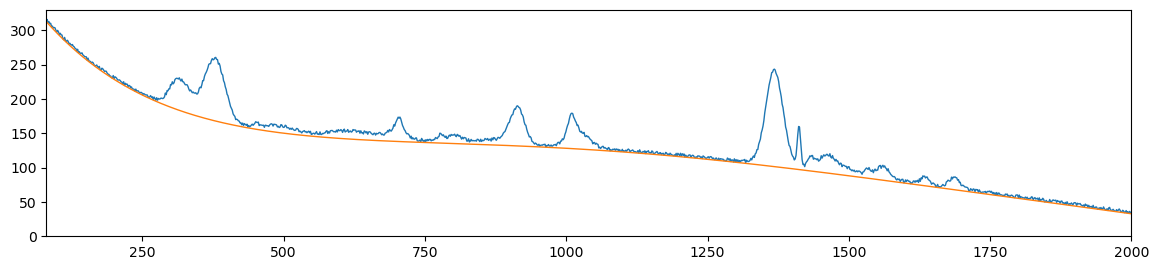

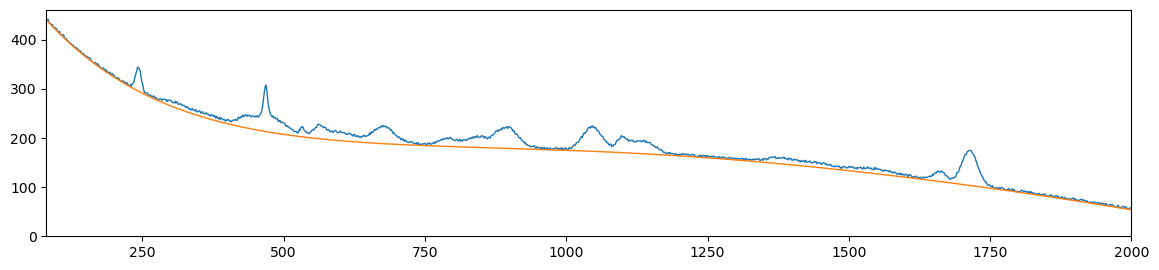

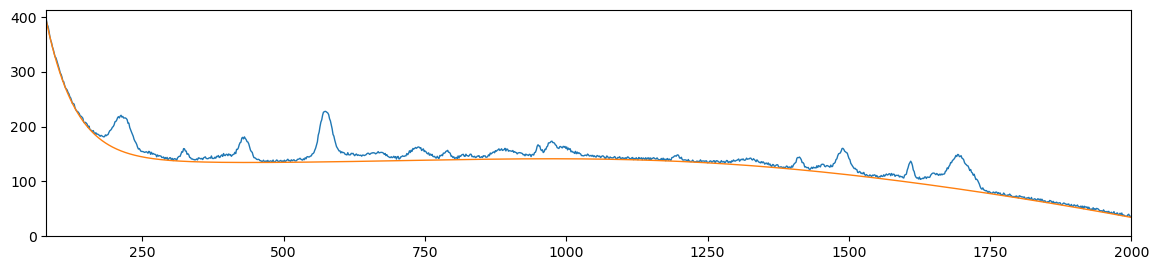

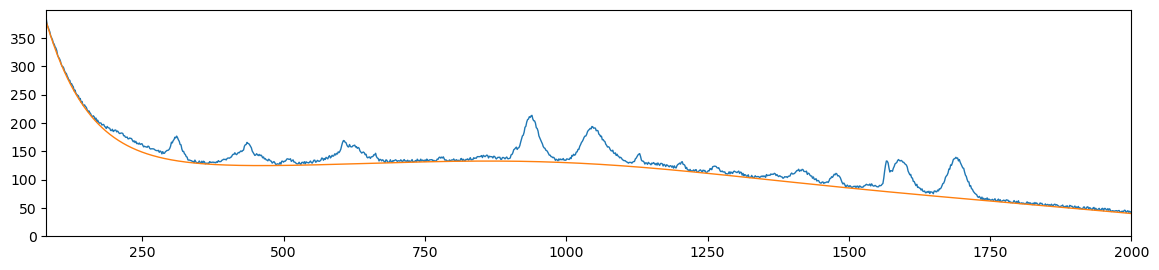

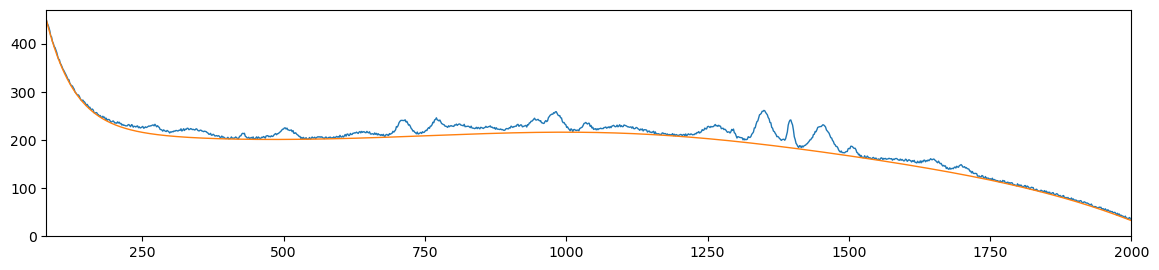

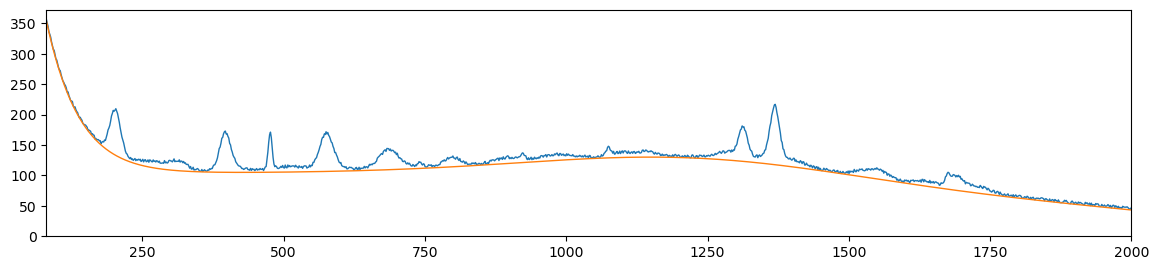

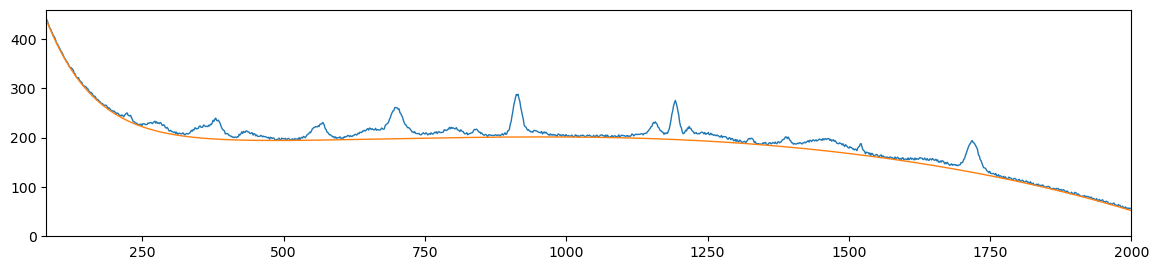

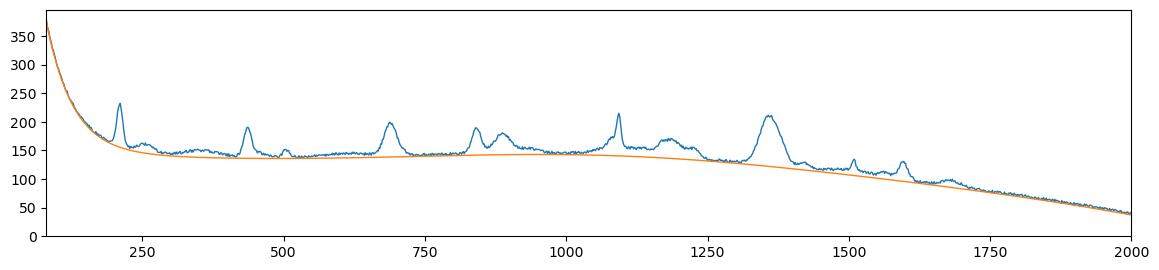

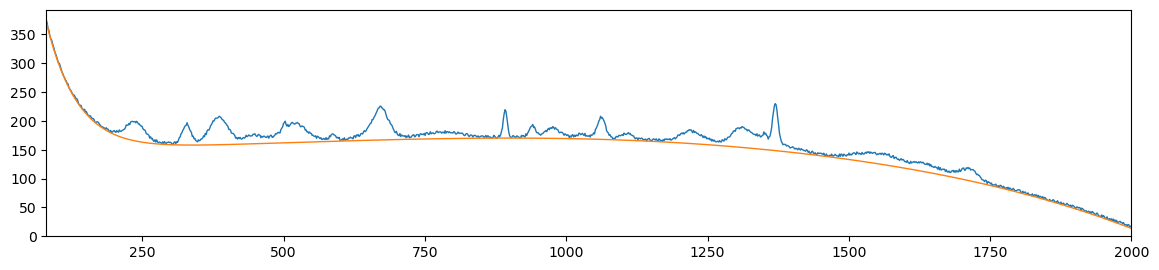

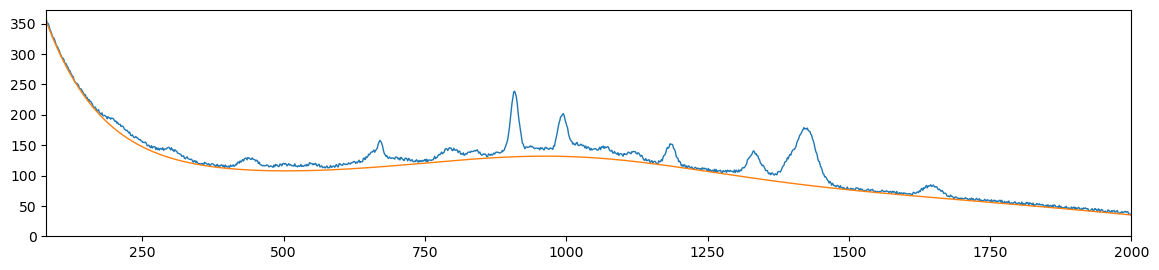

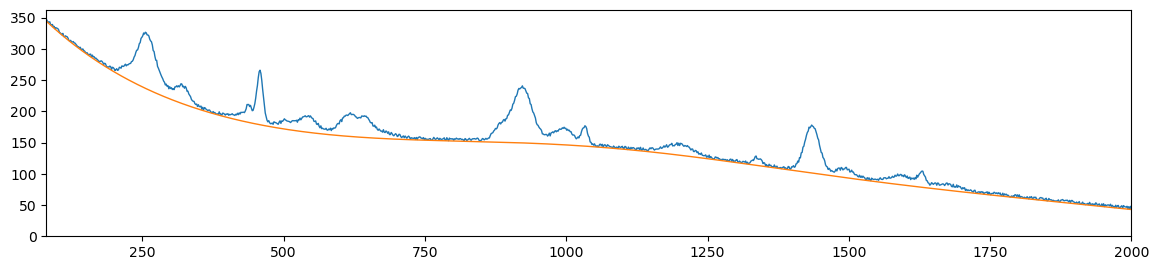

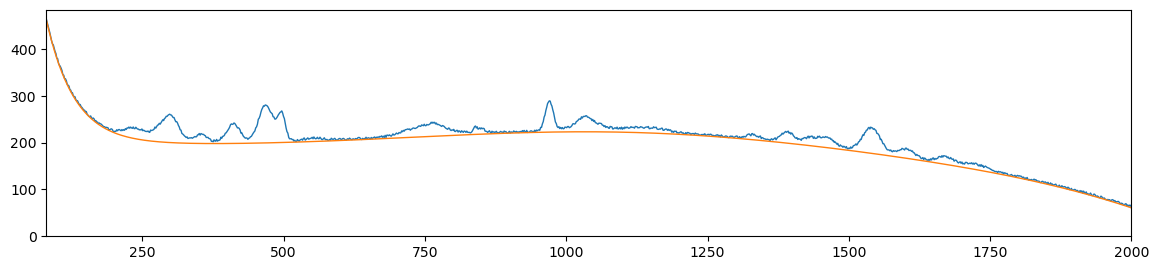

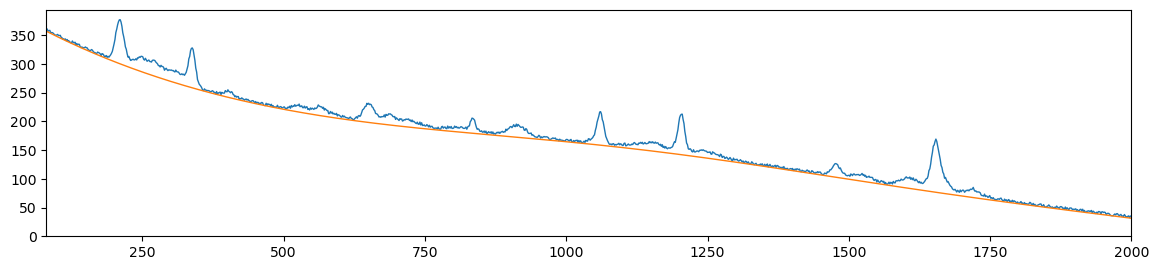

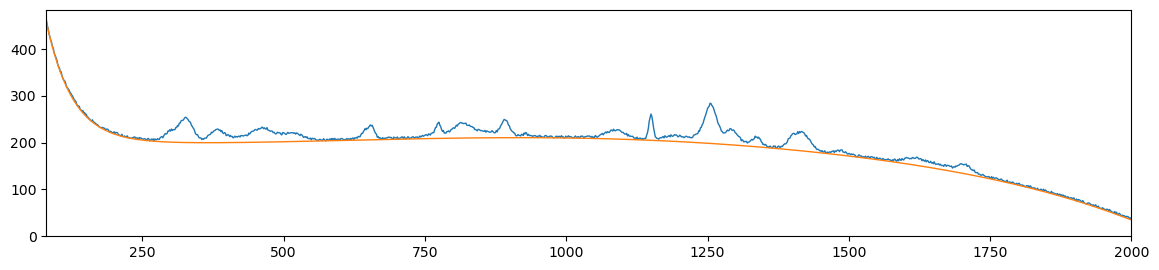

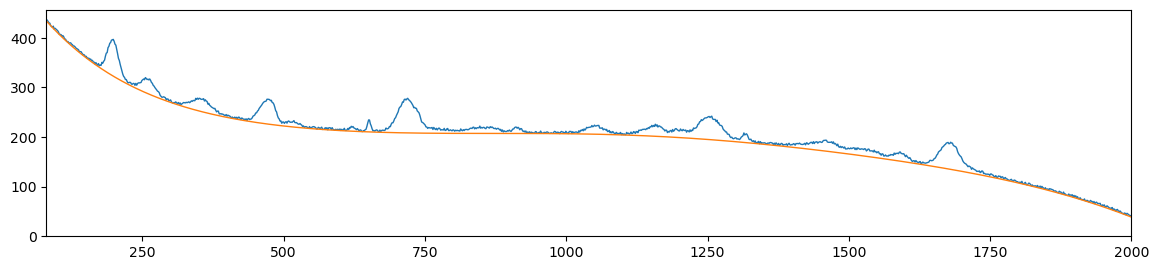

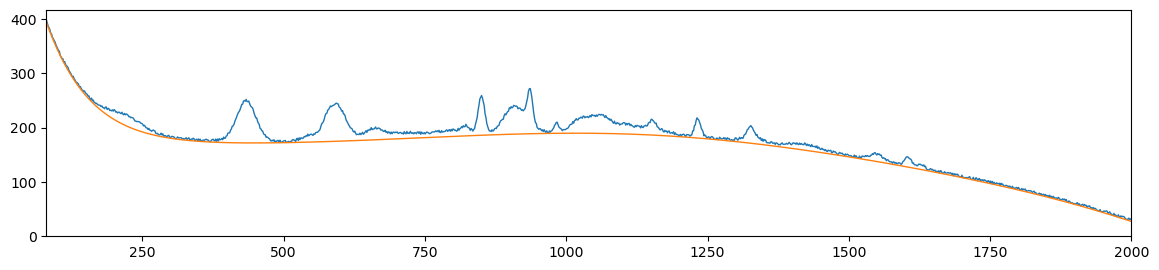

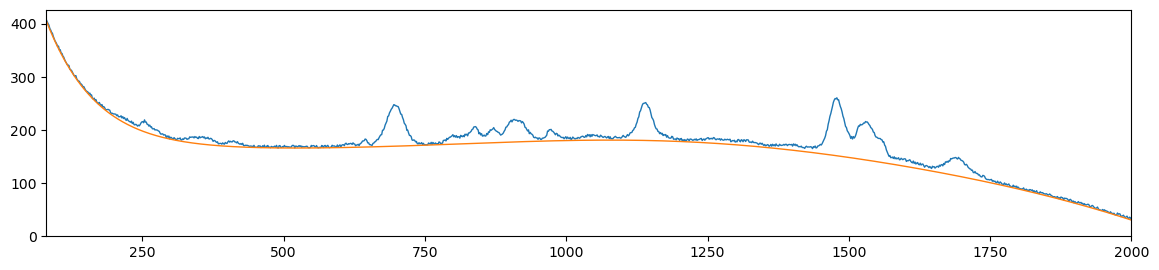

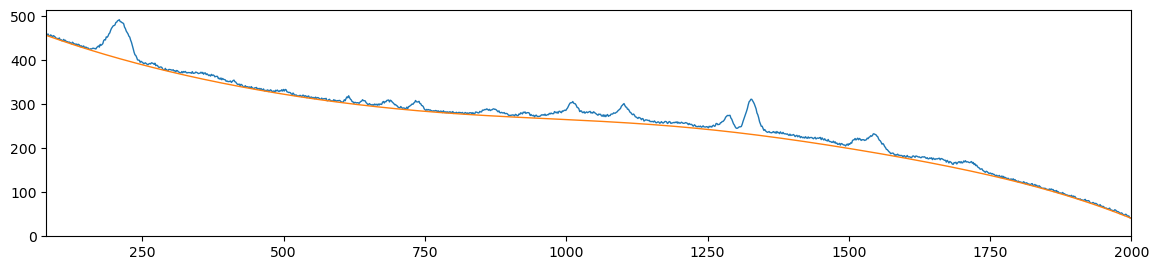

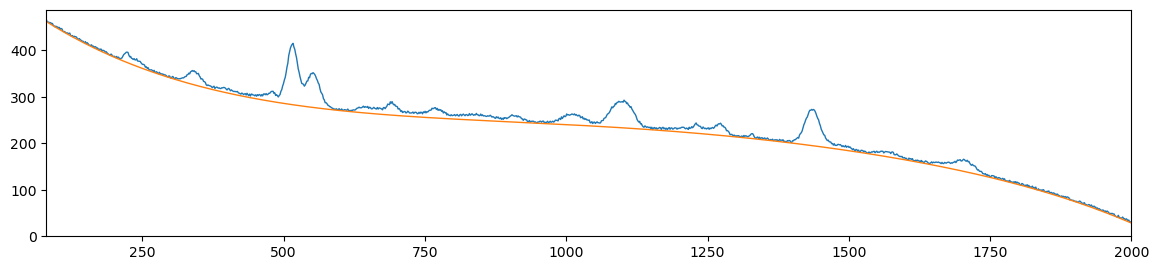

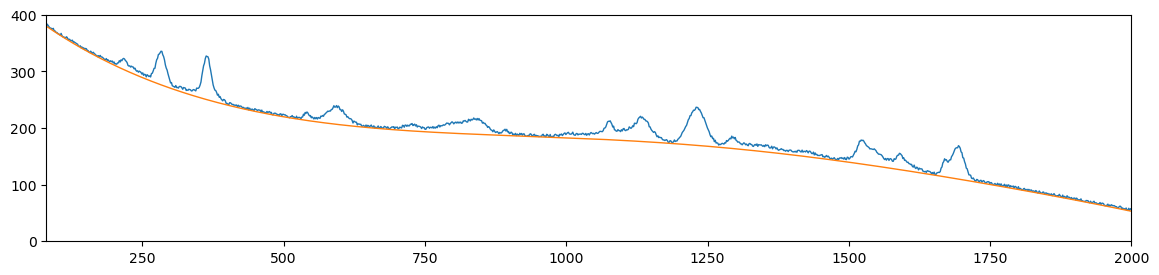

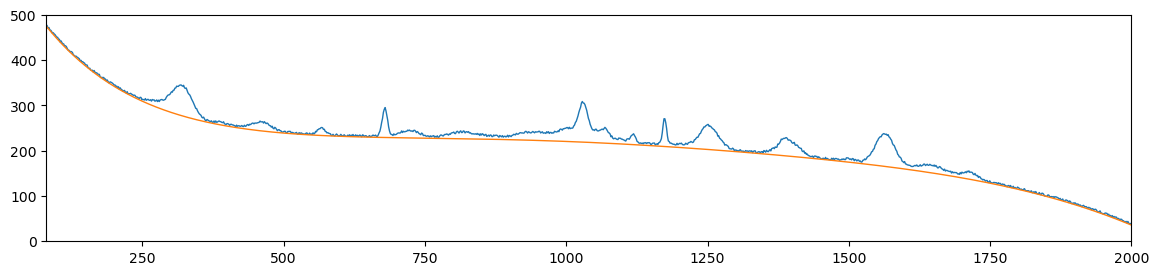

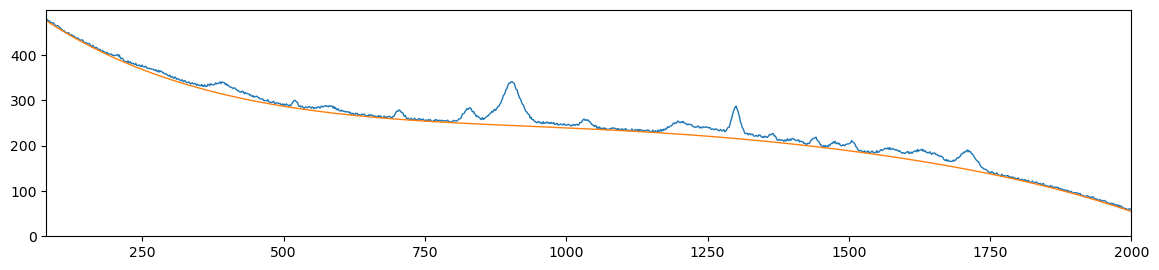

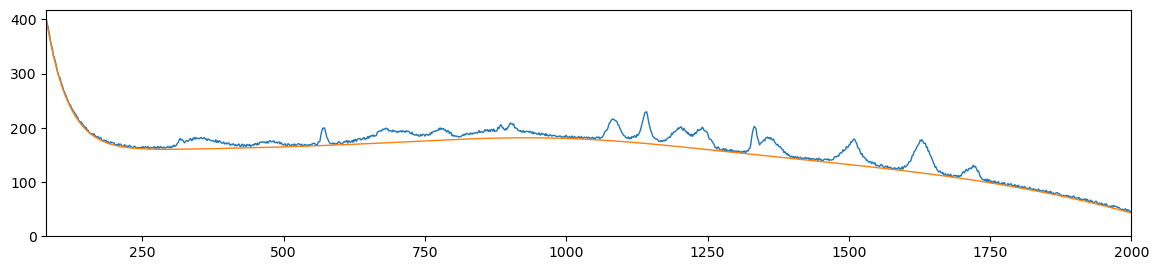

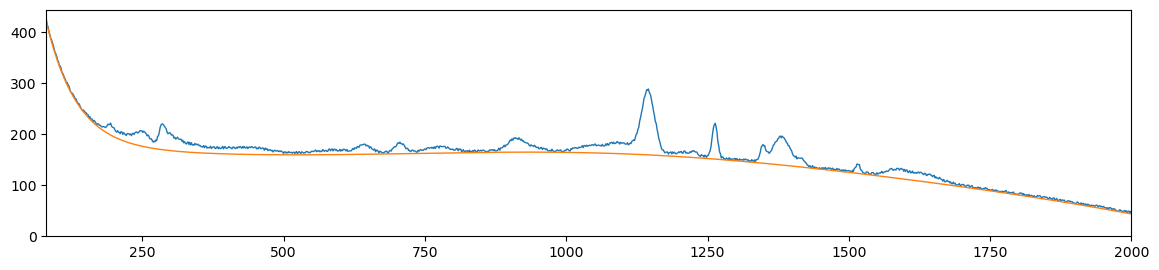

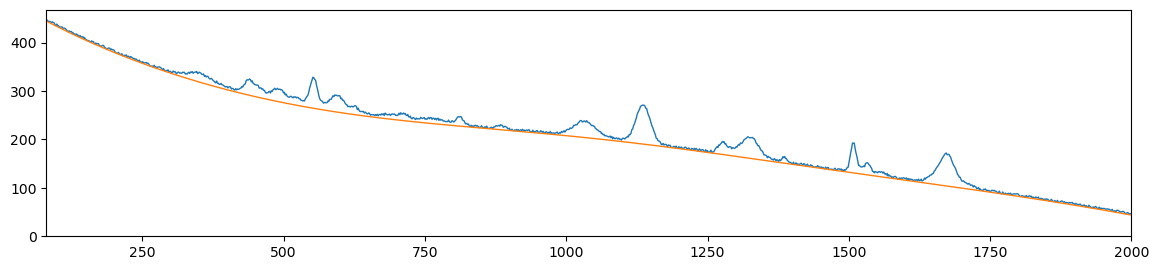

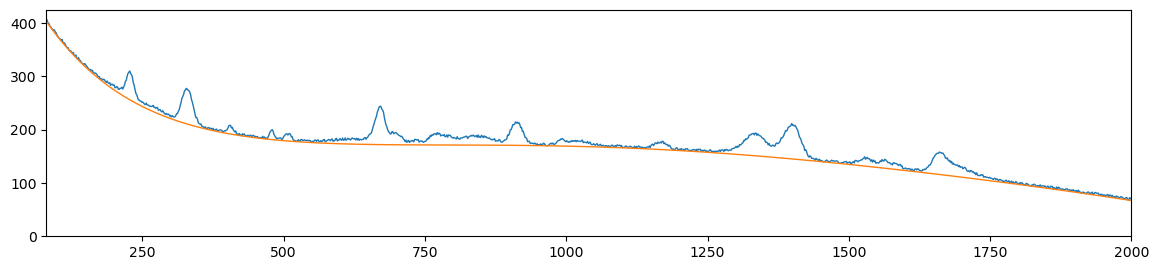

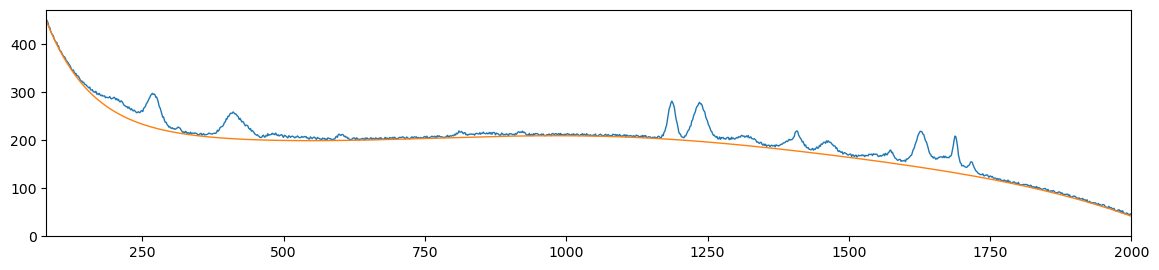

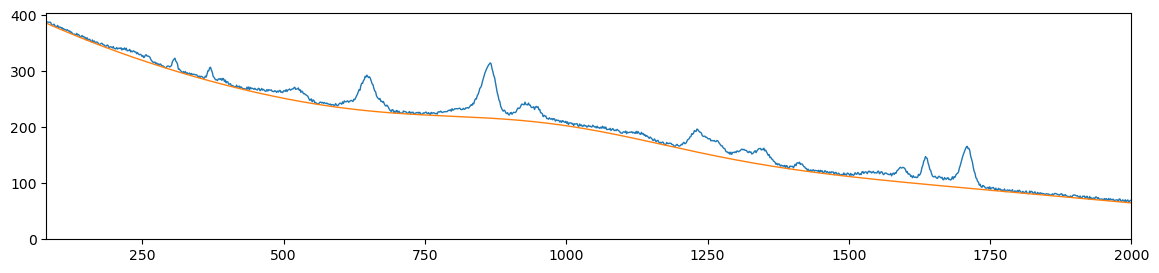

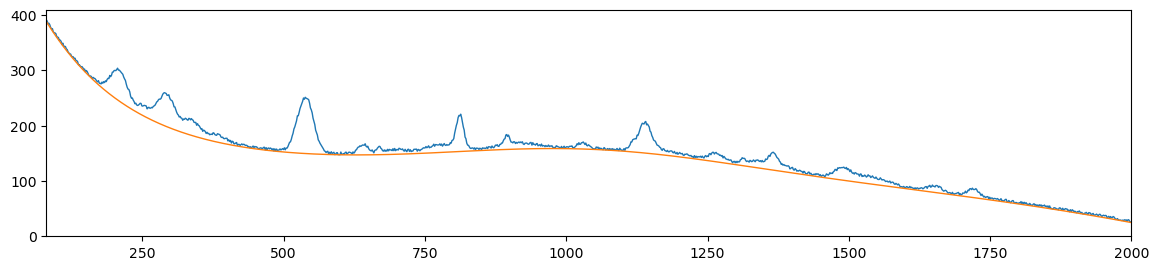

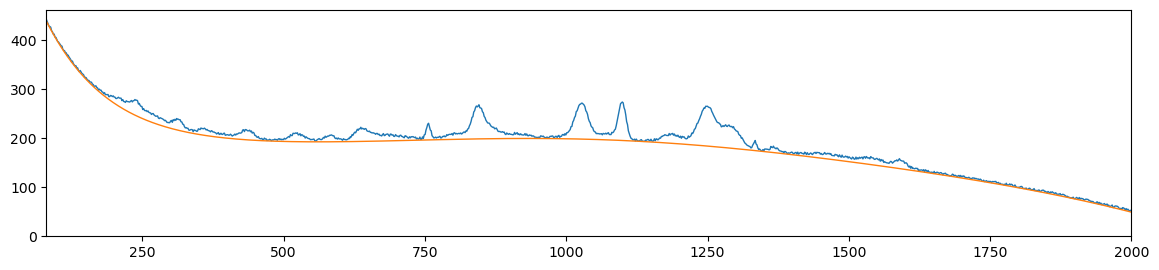

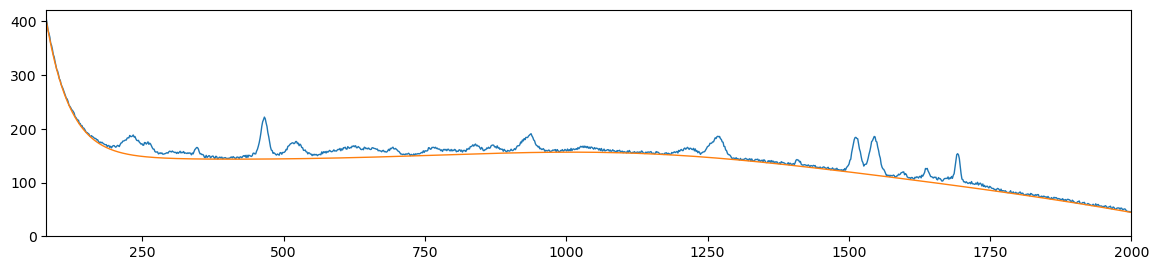

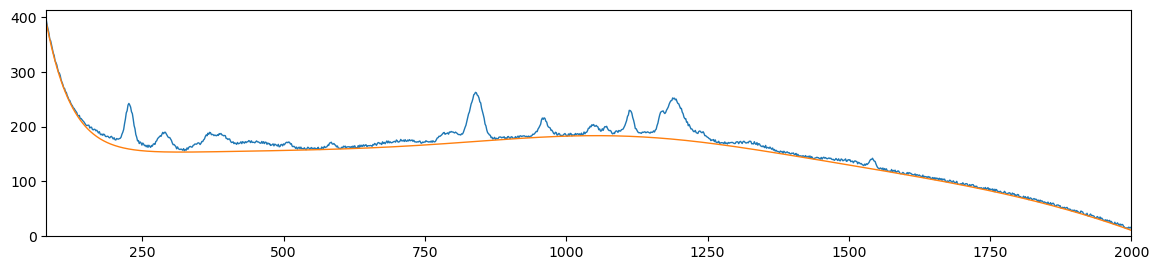

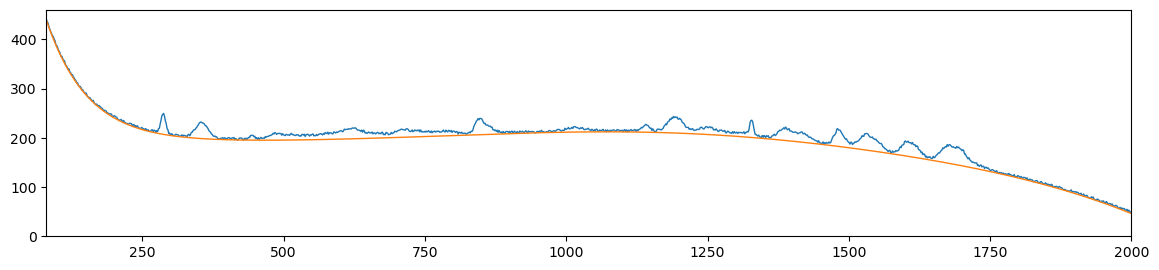

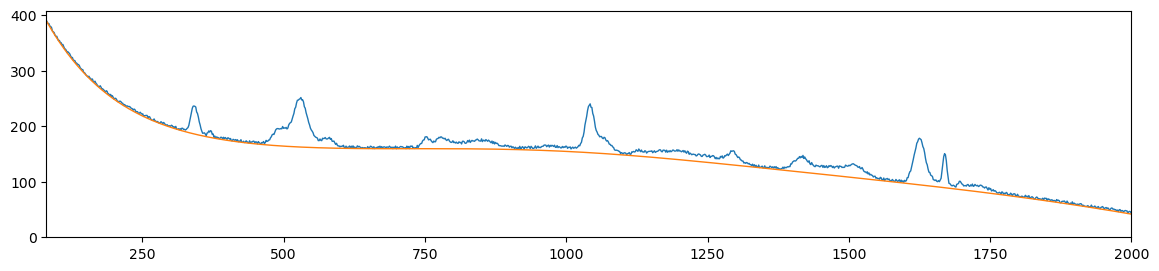

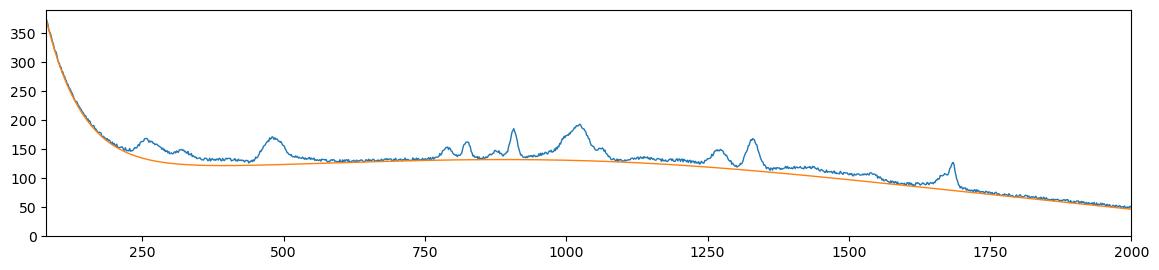

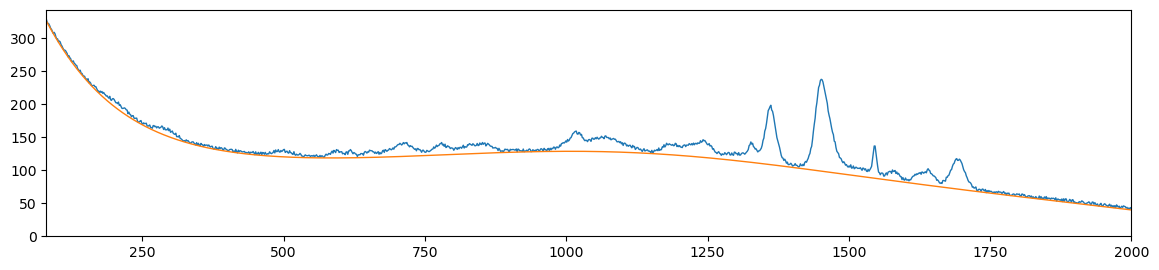

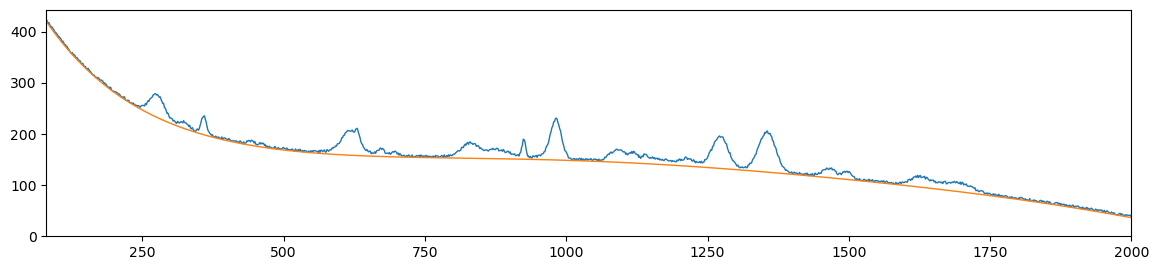

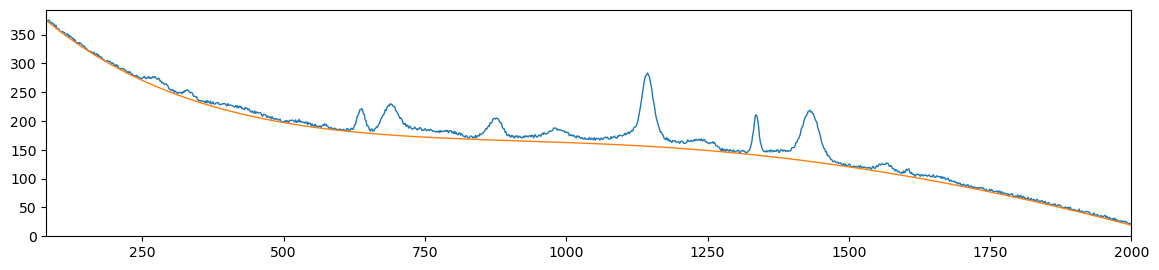

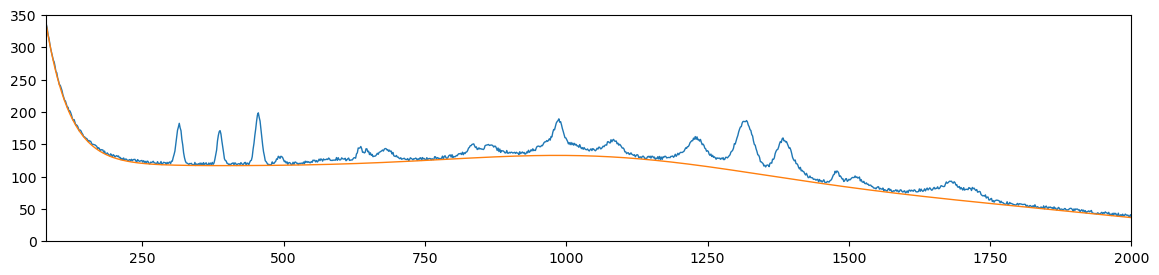

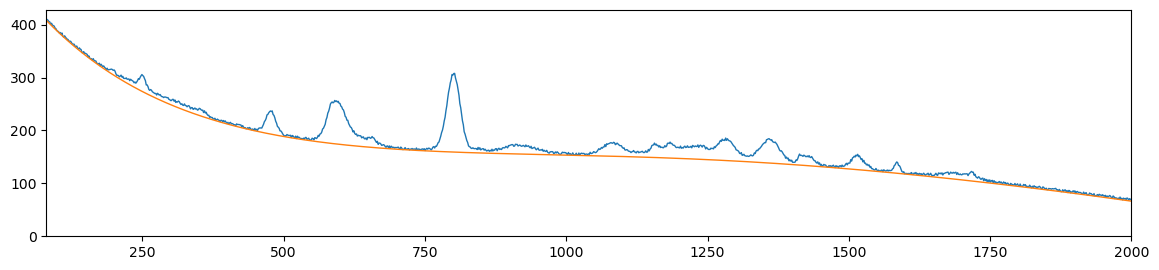

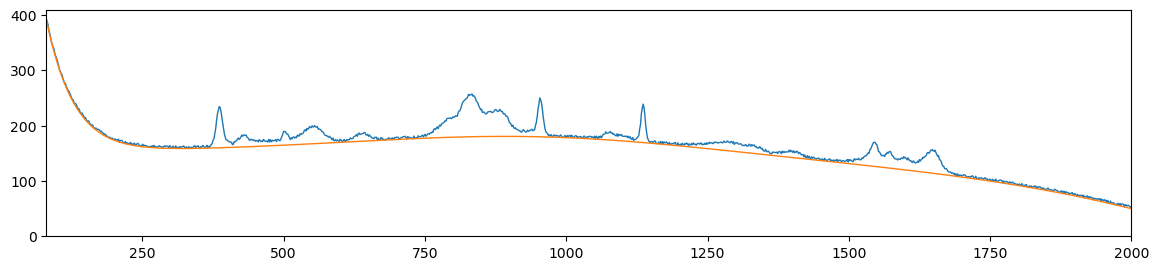

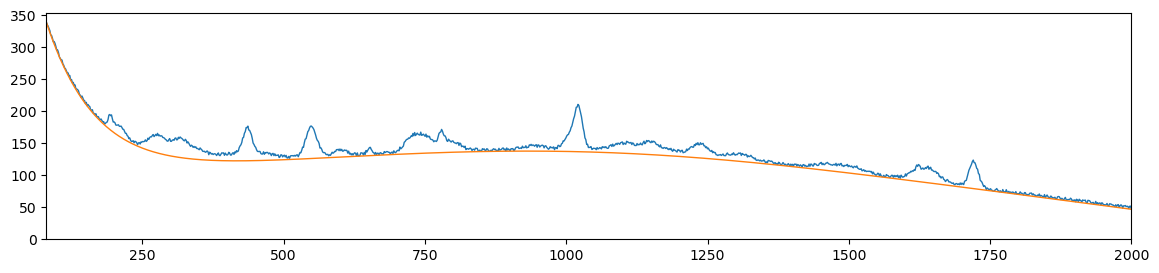

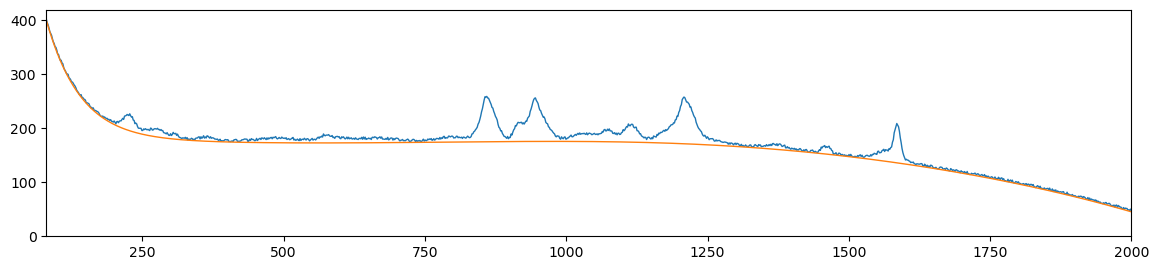

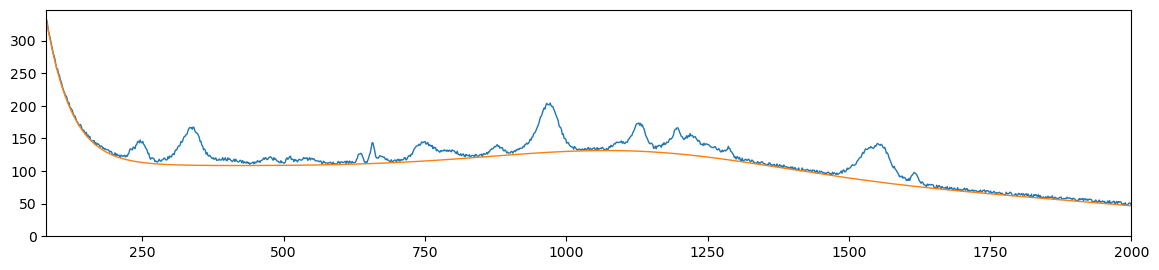

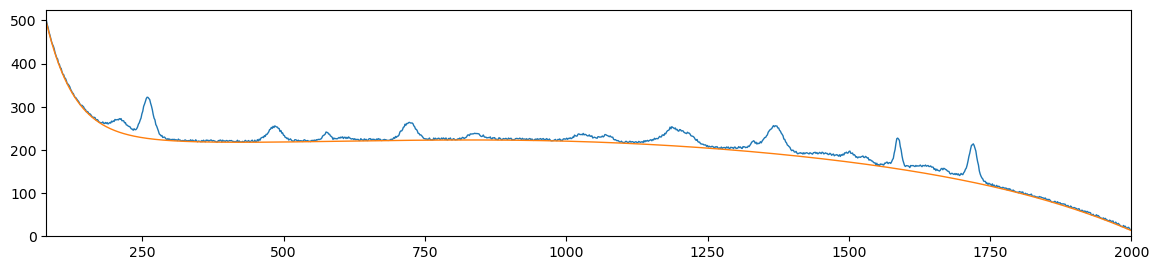

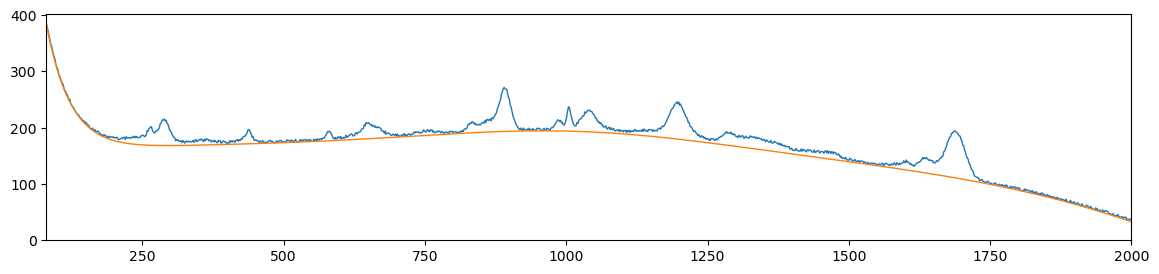

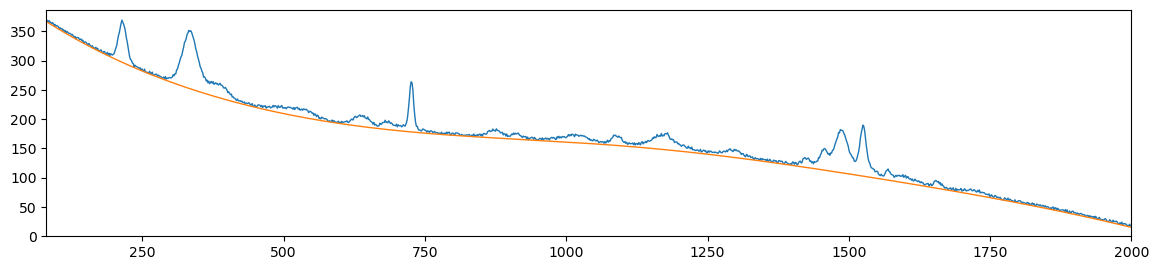

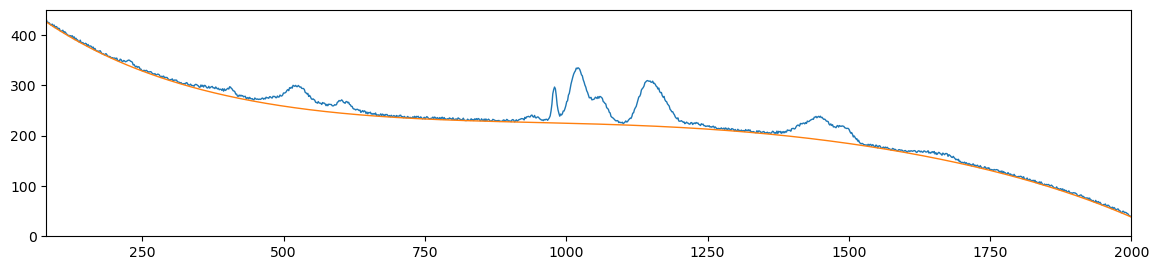

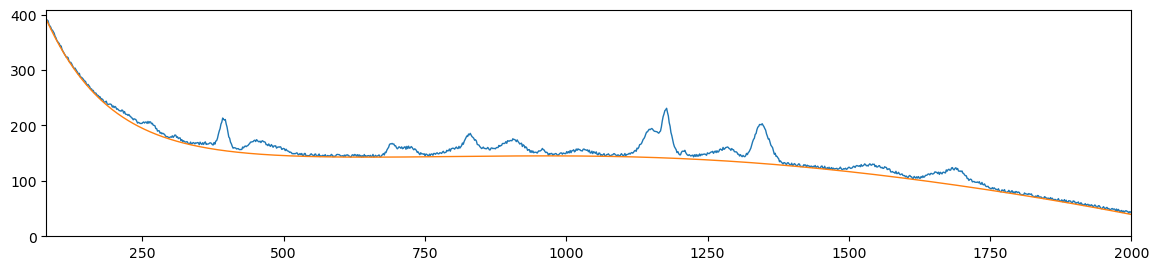

In [79]:
plt.rcParams['figure.figsize'] = (14.0, 3.0)
plt.rcParams['figure.dpi'] = 100
plt.rcParams['lines.linewidth'] = 1

def create_exp(x):
    return np.random.uniform(80,100)*np.exp(np.linspace(1,np.random.uniform(-1,-50),len(x))) 

def create_poly(x):
    max_power = np.random.randint(3,7)
    y = np.ones(x.shape) * np.random.uniform(20,40) + (max_power-1) * 30
    for power in range(1, max_power):
        y -= np.linspace(-1,1,len(x))**power * np.random.uniform(20,40)
    return y

def create_gaus(x):
    mu = np.random.uniform(600,800) * (end-start) / steps
    sigma = np.random.uniform(200,500)
    return np.exp(-0.5* ((x - mu)**2 / sigma**2)) * np.random.uniform(20,40)

def norm(e):
    return (e - np.min(e)) / (np.max(e) - np.min(e))

end = 2000
start = 80
steps = 1250
n = end-start
x = np.linspace(start, end, steps)


raw_lst = []
def create_dummy_spectra(expo=True, poly=True, gaus=True, raman=True):
    global raw_lst
    raw_lst = []
    for _ in range(100):
        photo  = np.zeros(x.shape)
        if expo:
            photo += create_exp(x)
        if poly:
            photo += create_poly(x)
        if gaus:
            photo += create_gaus(x)
        photo -= min(-5, np.min(photo))
        raw = copy.copy(photo)
                
        if raman:
            for _ in range(20):
                FWHM_spike = np.random.uniform(7,80)
                raman_mu = int(n*np.random.uniform(0.1,0.9))
                raw +=  np.random.uniform(5,10) * LSQ.gaussian(x, np.array([raman_mu]), np.array([FWHM_spike / (2 * np.sqrt(2 * np.log(2)))])).reshape(-1)
            for _ in range(10):
                FWHM_spike = np.random.uniform(7,40)
                raman_mu = int(n*np.random.uniform(0.1,0.9))
                raw +=  np.random.uniform(10,20) * LSQ.gaussian(x, np.array([raman_mu]), np.array([FWHM_spike / (2 * np.sqrt(2 * np.log(2)))])).reshape(-1)
            for _ in range(6):
                FWHM_spike = np.random.uniform(7,40)
                raman_mu = int(n*np.random.uniform(0.1,0.9))
                raw +=  np.random.uniform(20,80) * LSQ.gaussian(x, np.array([raman_mu]), np.array([FWHM_spike / (2 * np.sqrt(2 * np.log(2)))])).reshape(-1)
        
        raw += np.random.random(x.shape) * 5
        raw_lst.append((raw, photo))
    raw_lst = np.array(raw_lst)

create_dummy_spectra(expo=True, poly=True, gaus=True, raman=True)
for raw, p in raw_lst:
    plt.plot(x, raw)
    plt.plot(x,p)
    plt.xlim(start,end)
    plt.ylim(0)
    plt.show()

In [72]:
create_dummy_spectra(expo=True, poly=True, gaus=True, raman=True)

FWHM: 50,	 width: 0.5,	 kernel size: 42,	 error: 72.9378305576558, 	 smoothness: 0.3035837484882984, 	 smoothness: 0.3403932006966898


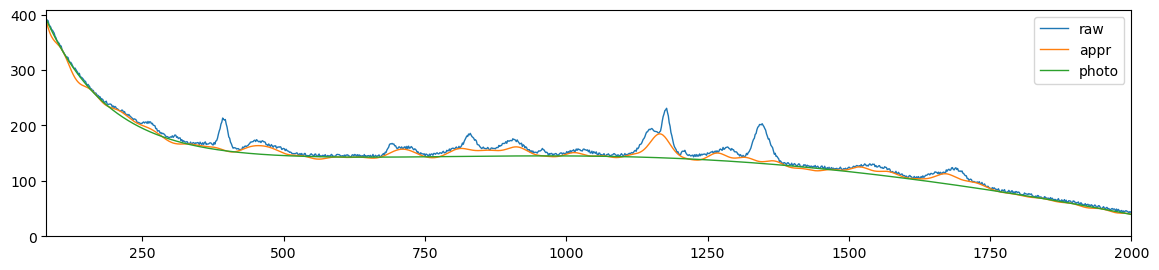

FWHM: 50,	 width: 0.51,	 kernel size: 42,	 error: 72.97306739088633, 	 smoothness: 0.3037533659380581, 	 smoothness: 0.3410677254151003


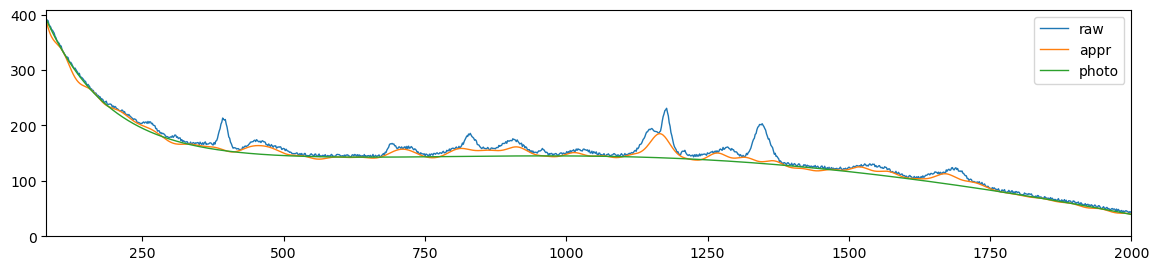

FWHM: 50,	 width: 0.52,	 kernel size: 43,	 error: 74.12194944272888, 	 smoothness: 0.2812560568112444, 	 smoothness: 0.31077208631991327


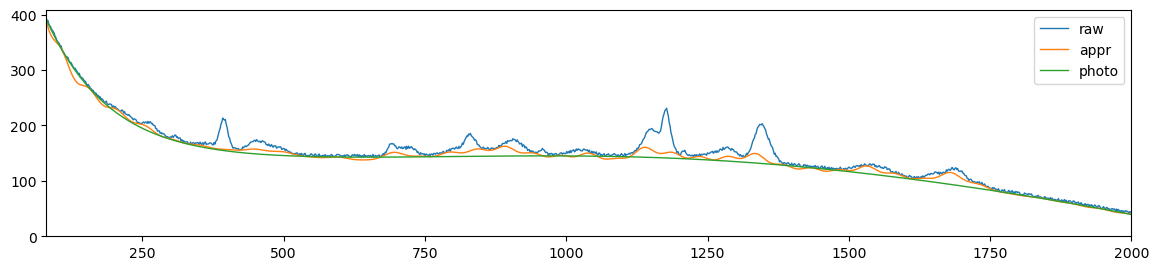

FWHM: 50,	 width: 0.53,	 kernel size: 44,	 error: 82.21303558242086, 	 smoothness: 0.2823146720651265, 	 smoothness: 0.3101041654540296


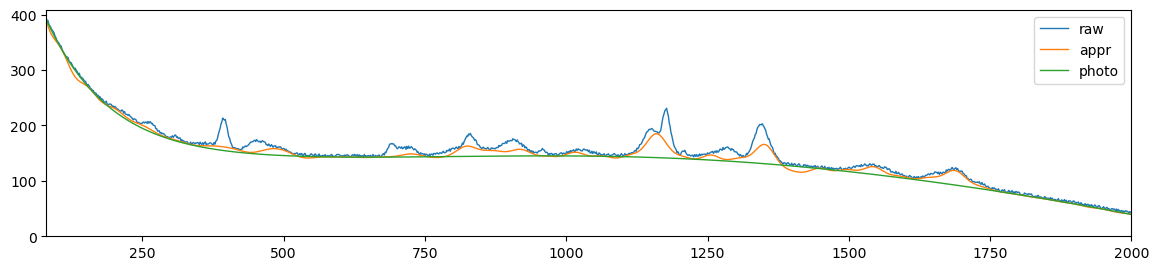

FWHM: 50,	 width: 0.54,	 kernel size: 44,	 error: 82.13875707056668, 	 smoothness: 0.28250903030049473, 	 smoothness: 0.3103924012700607


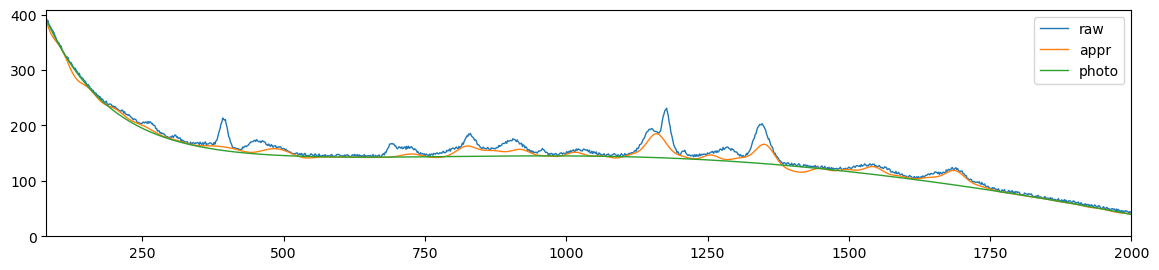

FWHM: 50,	 width: 0.55,	 kernel size: 45,	 error: 85.92155761643498, 	 smoothness: 0.2898622542953997, 	 smoothness: 0.3149139771728097


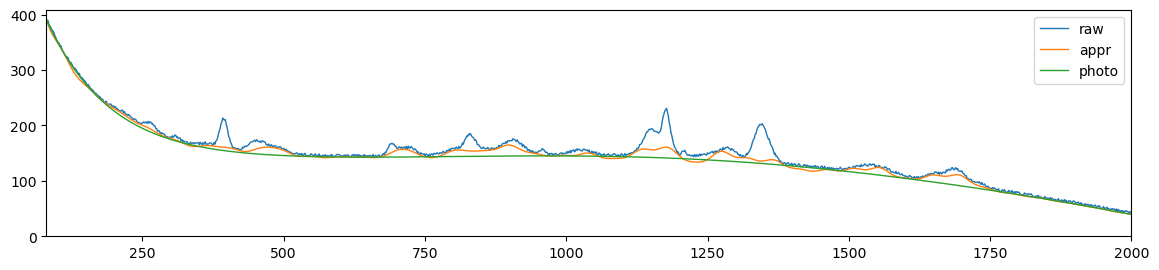

FWHM: 50,	 width: 0.56,	 kernel size: 45,	 error: 86.21027258375685, 	 smoothness: 0.29106641179980647, 	 smoothness: 0.3156689897886544


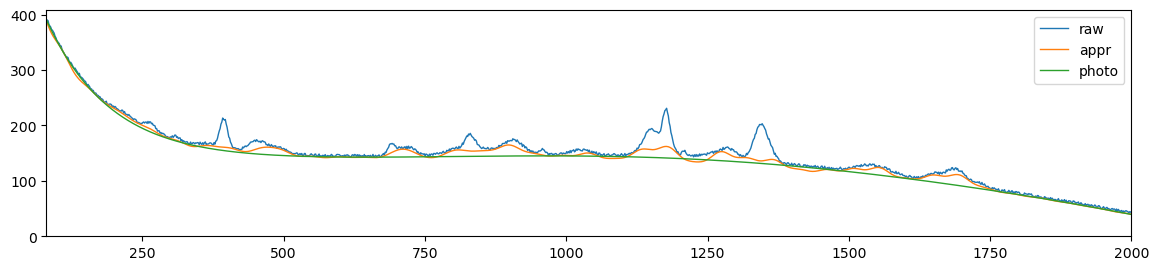

FWHM: 50,	 width: 0.5700000000000001,	 kernel size: 46,	 error: 84.0635084074635, 	 smoothness: 0.26845033859293754, 	 smoothness: 0.2894039103641941


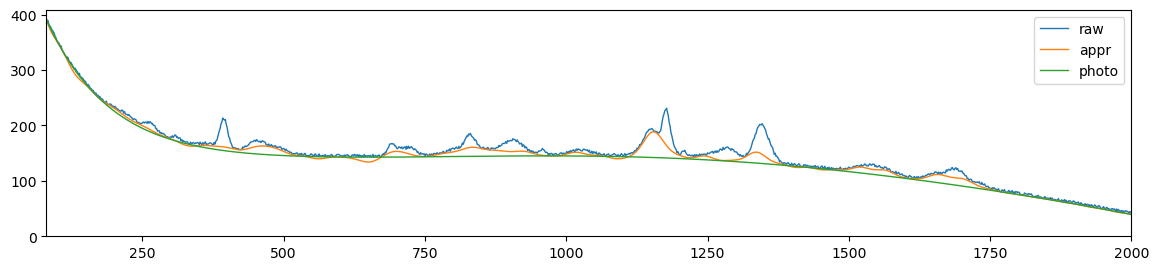

FWHM: 50,	 width: 0.58,	 kernel size: 47,	 error: 82.93292147270228, 	 smoothness: 0.2617396162615551, 	 smoothness: 0.28019575537552294


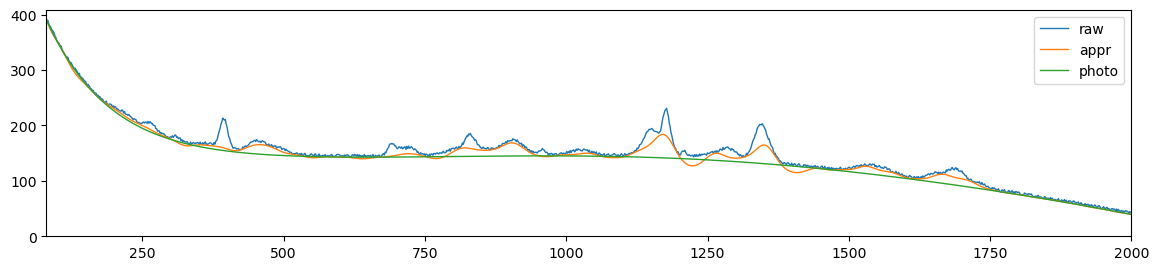

FWHM: 50,	 width: 0.59,	 kernel size: 48,	 error: 95.47269757440147, 	 smoothness: 0.30678901414595744, 	 smoothness: 0.32114225611576974


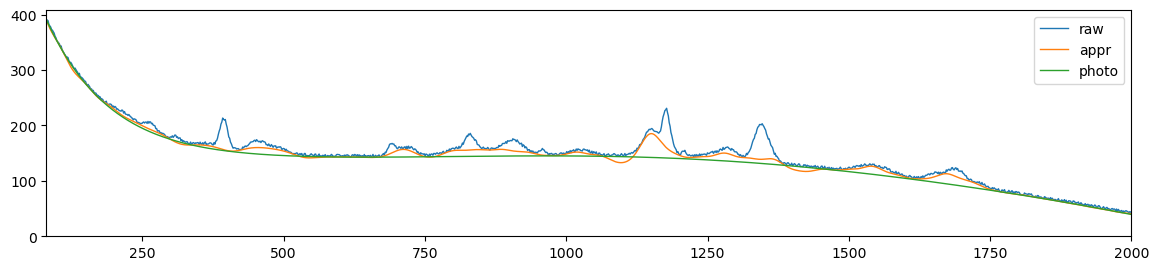

FWHM: 50,	 width: 0.6,	 kernel size: 48,	 error: 95.60784280535317, 	 smoothness: 0.30749650763254427, 	 smoothness: 0.32243064453799214


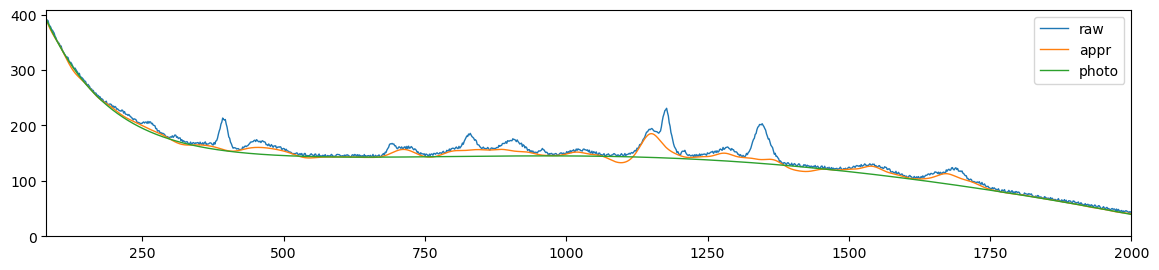

FWHM: 50,	 width: 0.61,	 kernel size: 49,	 error: 92.60559405551034, 	 smoothness: 0.28160770082062747, 	 smoothness: 0.28996291506994704


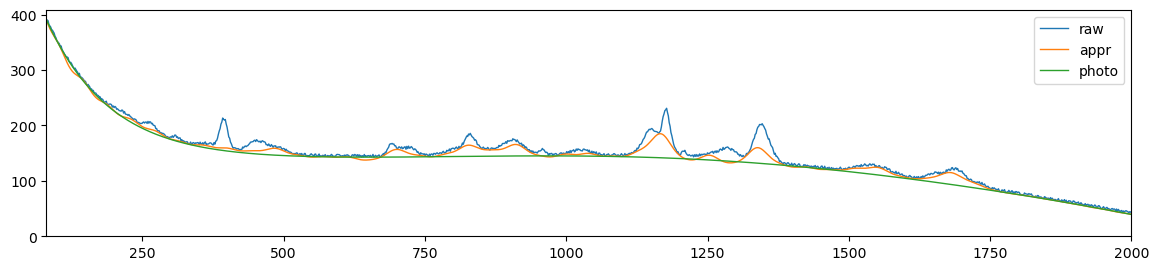

FWHM: 50,	 width: 0.62,	 kernel size: 50,	 error: 98.70228680643717, 	 smoothness: 0.3091004802519631, 	 smoothness: 0.31255447114807045


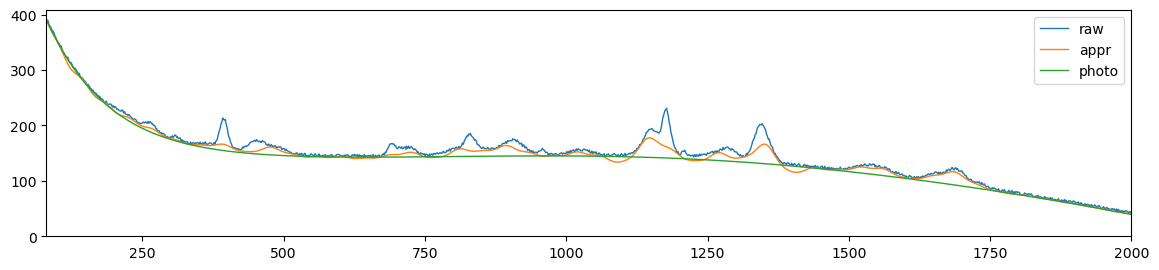

FWHM: 50,	 width: 0.63,	 kernel size: 51,	 error: 99.66500679448386, 	 smoothness: 0.30792181155535836, 	 smoothness: 0.3013751331140823


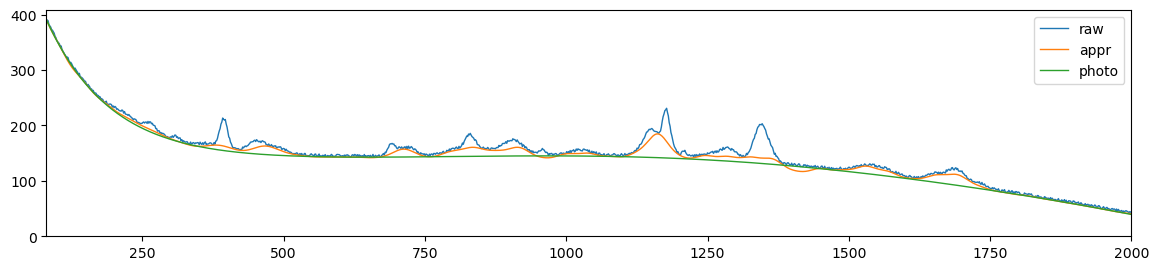

FWHM: 50,	 width: 0.64,	 kernel size: 51,	 error: 99.73533948409559, 	 smoothness: 0.30830987787740083, 	 smoothness: 0.30181616957654883


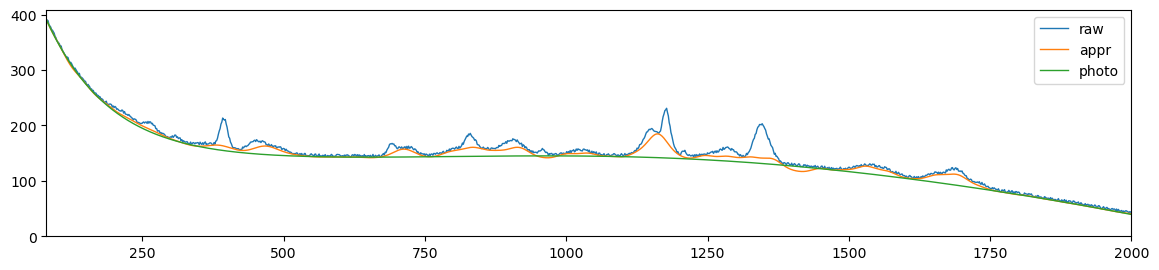

FWHM: 50,	 width: 0.65,	 kernel size: 52,	 error: 104.70648220925119, 	 smoothness: 0.3309094797592875, 	 smoothness: 0.31663180081838155


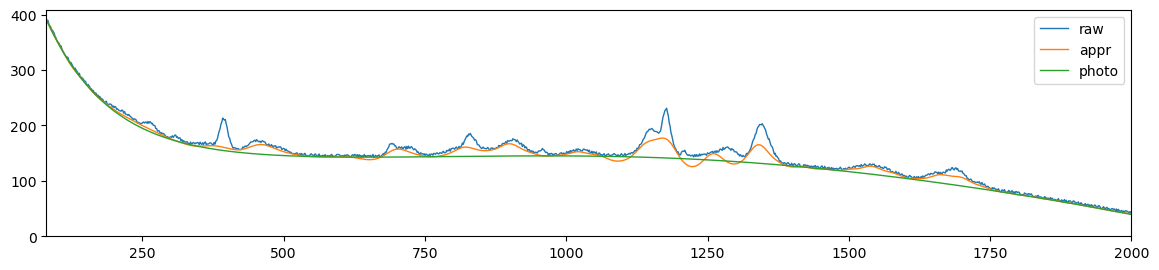

FWHM: 50,	 width: 0.66,	 kernel size: 53,	 error: 110.80508968611423, 	 smoothness: 0.36046215663943876, 	 smoothness: 0.3363275645770193


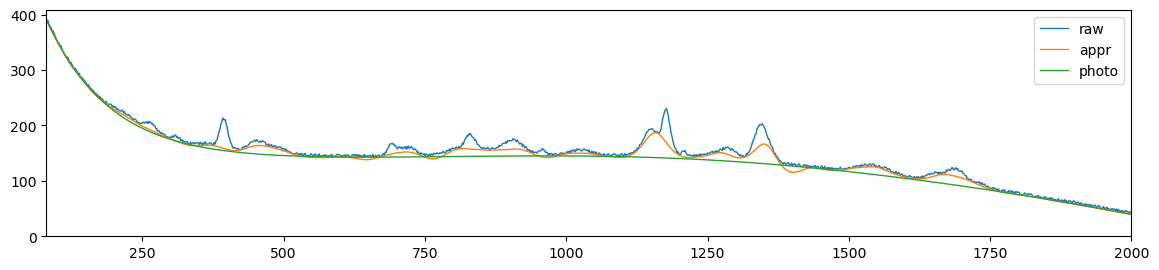

FWHM: 50,	 width: 0.67,	 kernel size: 54,	 error: 114.22007457565579, 	 smoothness: 0.37413522018861123, 	 smoothness: 0.3433576768574513


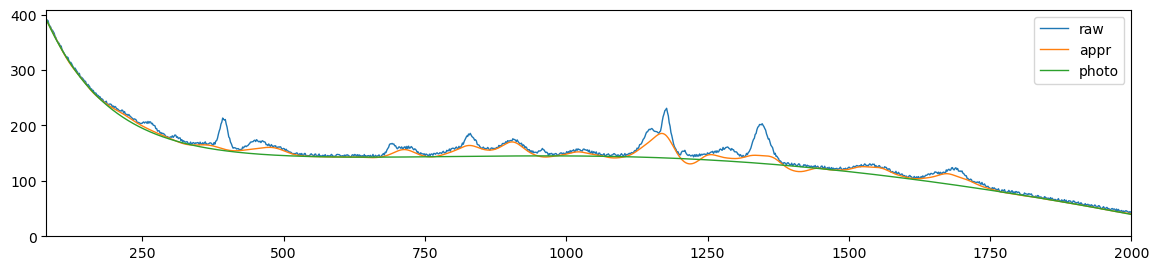

FWHM: 50,	 width: 0.6799999999999999,	 kernel size: 55,	 error: 116.01027793317716, 	 smoothness: 0.3865846199634311, 	 smoothness: 0.34298510600693155


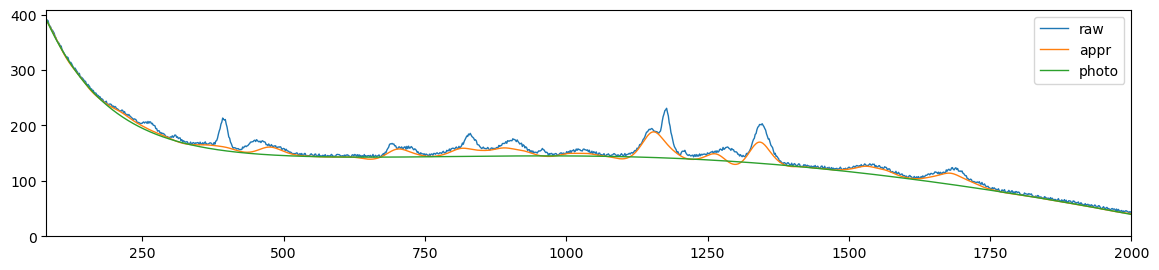

FWHM: 50,	 width: 0.69,	 kernel size: 56,	 error: 123.1784181124458, 	 smoothness: 0.4366976700765279, 	 smoothness: 0.373849474459745


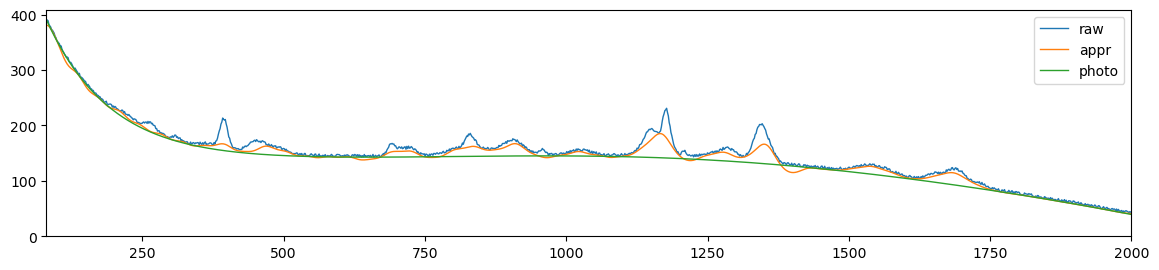

FWHM: 50,	 width: 0.7,	 kernel size: 57,	 error: 123.63086701428072, 	 smoothness: 0.43293379663717574, 	 smoothness: 0.35962329041270796


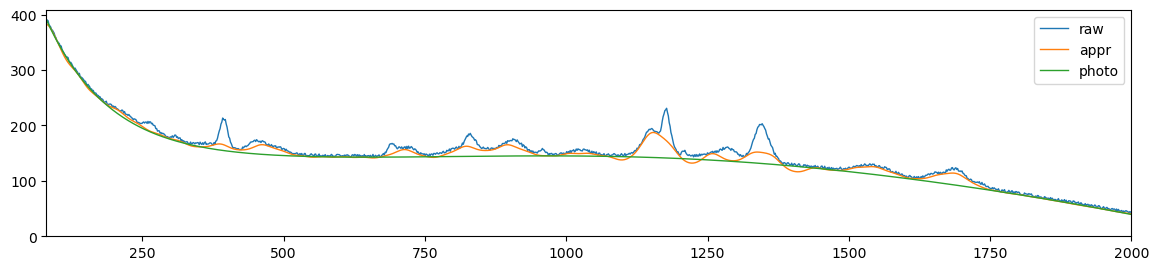

FWHM: 50,	 width: 0.71,	 kernel size: 58,	 error: 123.65848334588823, 	 smoothness: 0.4382076993491421, 	 smoothness: 0.3599685466736608


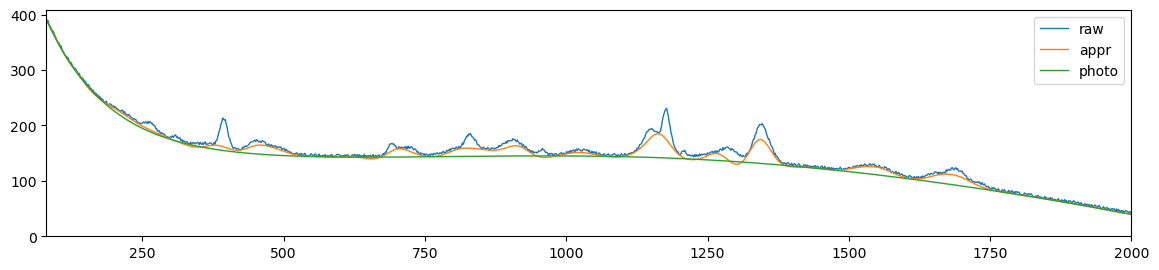

FWHM: 50,	 width: 0.72,	 kernel size: 59,	 error: 132.78542681306106, 	 smoothness: 0.4777603046724256, 	 smoothness: 0.4056821703369111


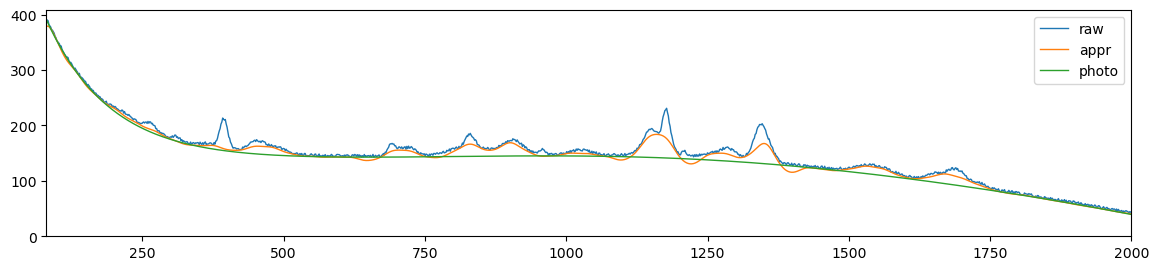

FWHM: 50,	 width: 0.73,	 kernel size: 60,	 error: 135.0354039414469, 	 smoothness: 0.5155074205557054, 	 smoothness: 0.40983457049985256


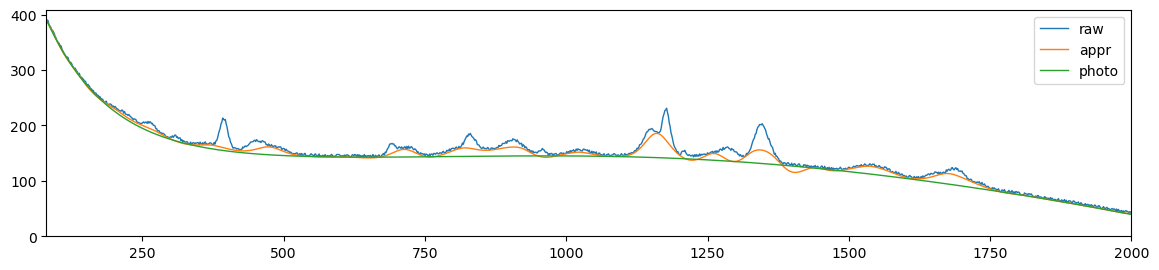

FWHM: 50,	 width: 0.74,	 kernel size: 62,	 error: 137.43221793405547, 	 smoothness: 0.5330030832823393, 	 smoothness: 0.4142993293655175


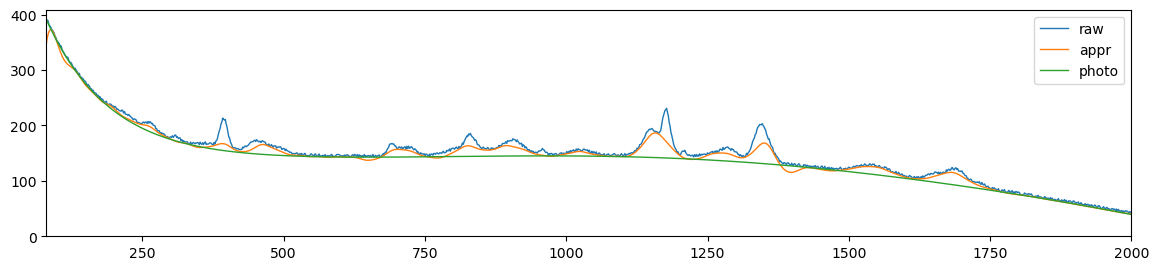

FWHM: 50,	 width: 0.75,	 kernel size: 63,	 error: 143.0916643302521, 	 smoothness: 0.5388810964692172, 	 smoothness: 0.45804193730262227


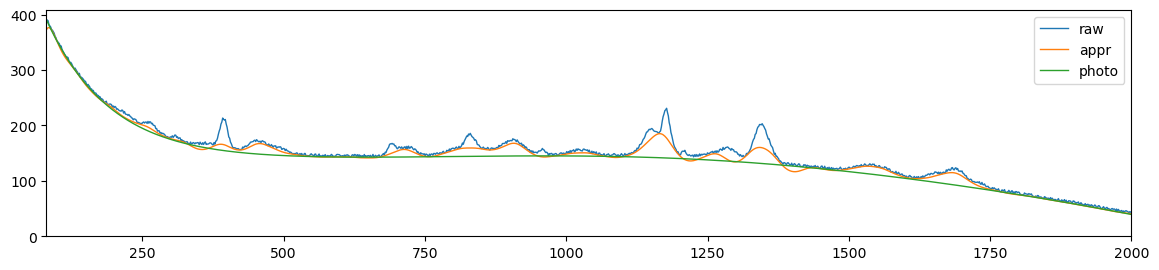

FWHM: 50,	 width: 0.76,	 kernel size: 65,	 error: 147.62006720878213, 	 smoothness: 0.548896916589329, 	 smoothness: 0.5000303511160806


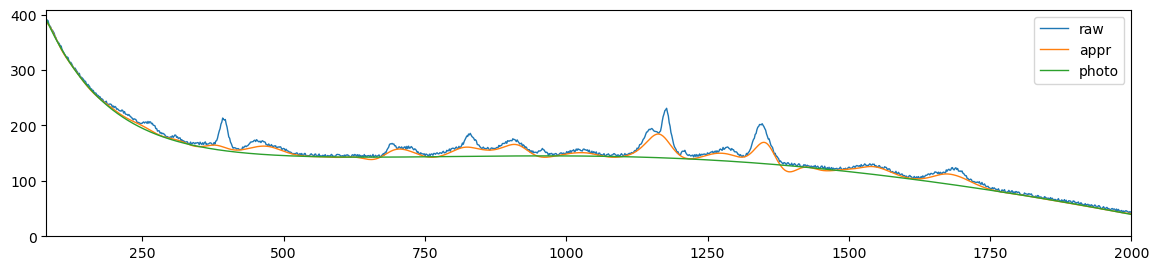

FWHM: 50,	 width: 0.77,	 kernel size: 66,	 error: 151.60218682278975, 	 smoothness: 0.5693857318390743, 	 smoothness: 0.5304463045096582


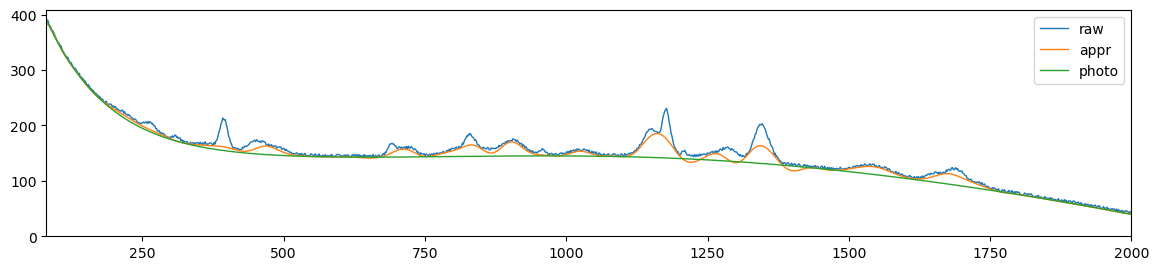

FWHM: 50,	 width: 0.78,	 kernel size: 68,	 error: 156.46170577782632, 	 smoothness: 0.5962895816495799, 	 smoothness: 0.5753302058391886


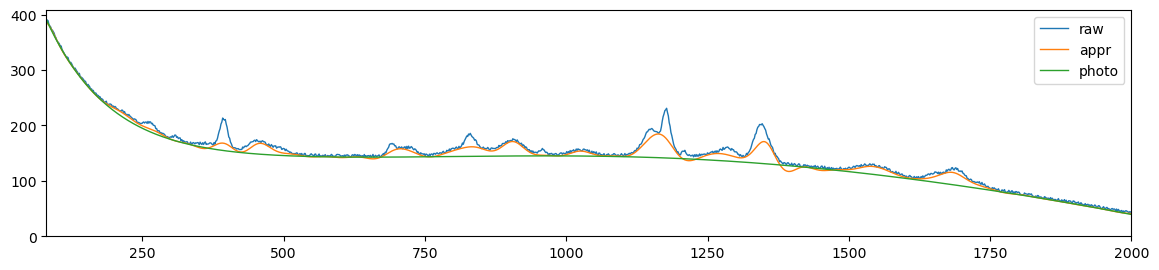

FWHM: 50,	 width: 0.79,	 kernel size: 69,	 error: 163.10810030421922, 	 smoothness: 0.6277474521375426, 	 smoothness: 0.6138497696721228


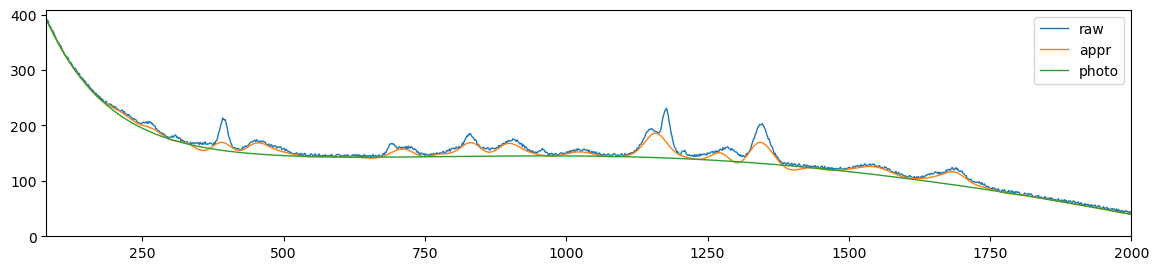

FWHM: 50,	 width: 0.8,	 kernel size: 71,	 error: 166.7576984961335, 	 smoothness: 0.6544402578265098, 	 smoothness: 0.6460651204126674


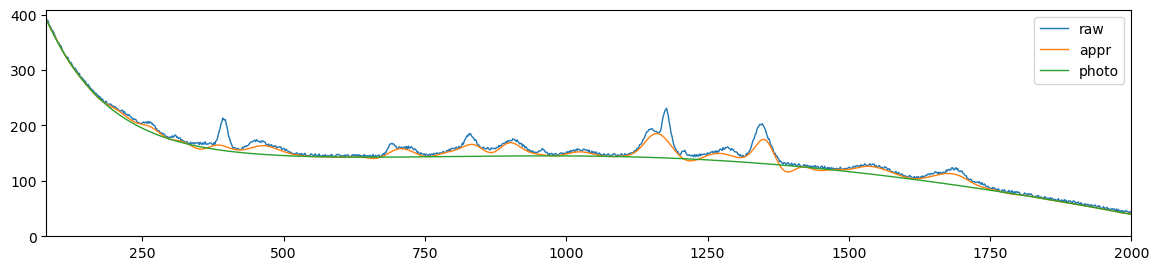

FWHM: 50,	 width: 0.81,	 kernel size: 73,	 error: 173.046296574798, 	 smoothness: 0.6953578845691832, 	 smoothness: 0.6882760659641833


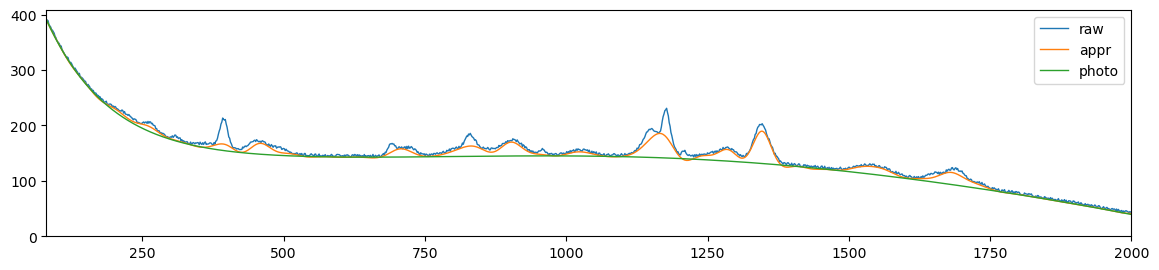

FWHM: 50,	 width: 0.8200000000000001,	 kernel size: 75,	 error: 177.89219368541882, 	 smoothness: 0.7326078073418316, 	 smoothness: 0.7255219160822631


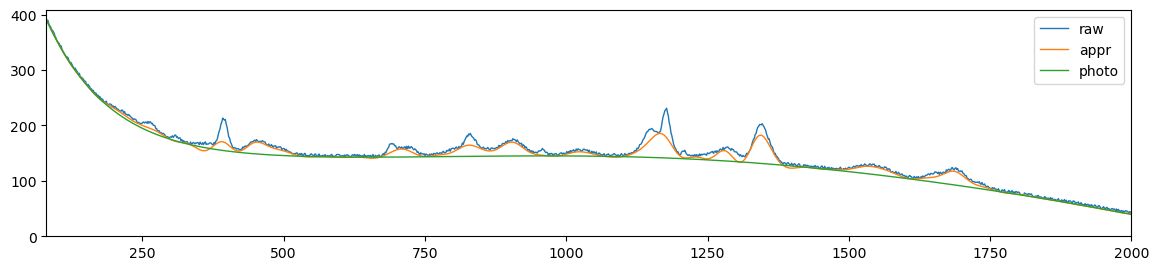

FWHM: 50,	 width: 0.8300000000000001,	 kernel size: 78,	 error: 186.05727614840012, 	 smoothness: 0.7944226909185894, 	 smoothness: 0.7877495959628996


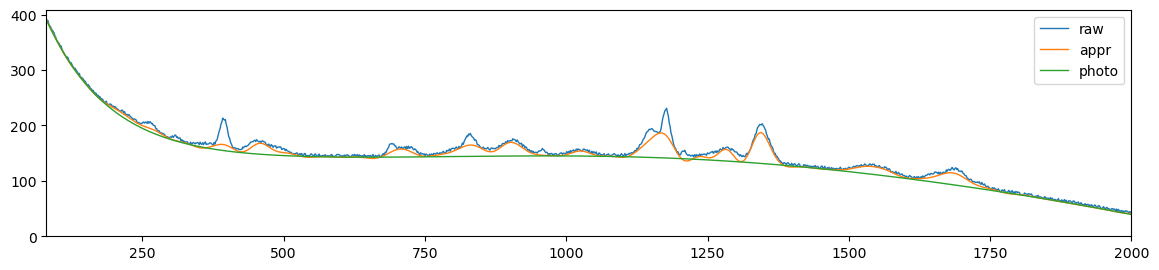

FWHM: 50,	 width: 0.8400000000000001,	 kernel size: 80,	 error: 193.6837306270716, 	 smoothness: 0.8408296311453429, 	 smoothness: 0.8334708627272954


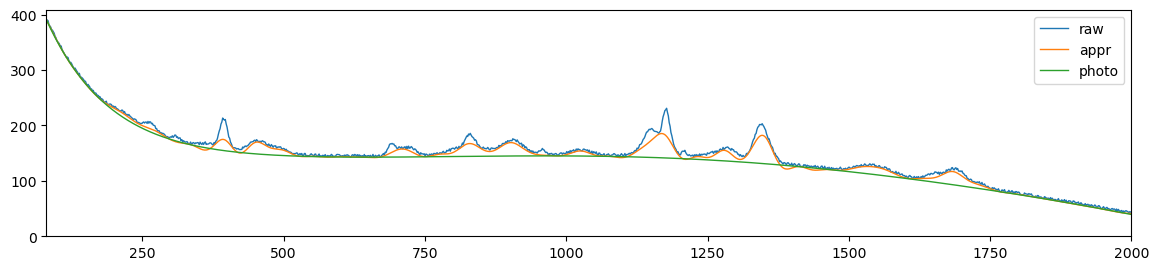

FWHM: 50,	 width: 0.8500000000000001,	 kernel size: 83,	 error: 202.51945961887773, 	 smoothness: 0.9072363304571853, 	 smoothness: 0.8990547713010932


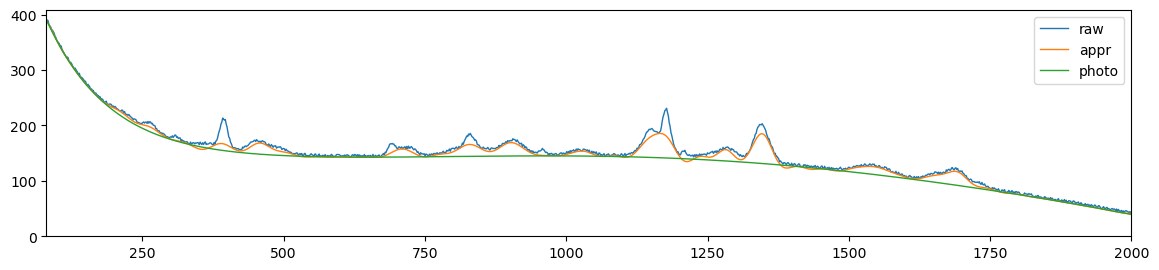

FWHM: 50,	 width: 0.86,	 kernel size: 86,	 error: 207.9802407824022, 	 smoothness: 0.9534350112972855, 	 smoothness: 0.9449268629070608


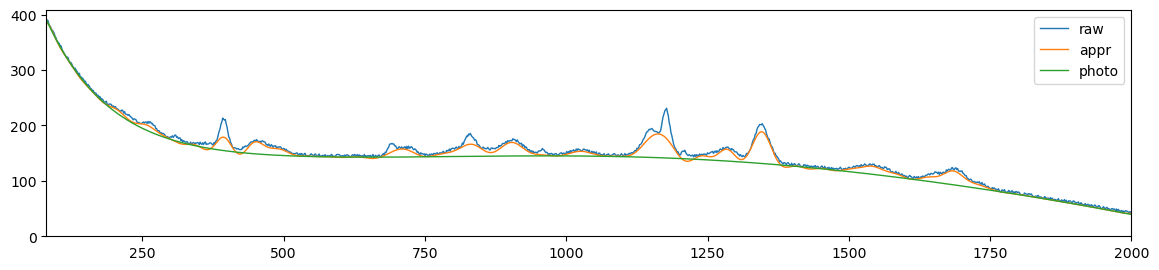

KeyboardInterrupt: 

In [80]:
plt.rcParams['figure.figsize'] = (14.0, 3.0)
plt.rcParams['figure.dpi'] = 100
plt.rcParams['lines.linewidth'] = 1

error_lst = []
error_lst2 = []
error_lst3 = []

FWHM_RBF_lst = range(50,1001,50)
# width_lst = np.concatenate((np.linspace(0.99,0.89,11), .98 - np.logspace(-1,-0.31876,10)))
width_lst = np.linspace(0.5,0.99, 50)
for FWHM_RBF in FWHM_RBF_lst:
    for width in width_lst:
        e = []
        e2 = []
        e3 = []
        LS = LSQ.photo_approximation(x, order=1, FWHM=FWHM_RBF, size=len(x), width=width)
        for raw, real_photo in raw_lst:
            weights = np.ones(len(x))
            poly_max = copy.copy(raw).reshape(1,-1)
            photo_old = -1
            photo = poly_max
            i = 0
            while ((old:=error.MAPE(photo_old, photo)) > 1e-3 and i < 30) or i < 2:
                photo, photo_old = LS(poly_max, weights), photo
                to_high = photo > raw
                mean_error = np.mean(to_high, 0)
                weights += mean_error
                weights /= np.mean(weights)
                poly_max[to_high] += (raw-photo)[to_high] * 0.5
                poly_max[poly_max <= 0] = 1e-3
                i += 1
                photo[photo < 1] = 1
            e += [error.MSE(photo[0], real_photo)]
            e2 += [error.TMSGE(photo[0], real_photo)]
            e3 += [error.MSGE(photo[0]) - error.MSGE(real_photo)]
#             print(error.MSE(photo[0], real_photo), error.TMSGE(photo[0], real_photo))
#         print(np.mean(e),np.std(e), np.mean(e2),np.std(e2),np.mean(e3),np.std(e3))
        i = np.argmax(e)
        e = np.mean(e) + 0*np.std(e)
        e2 = np.mean(e2) + 0*np.std(e2)
        e3 = np.mean(e3) + 0*np.std(e3)
        error_lst.append(e)
        error_lst2.append(e2)
        error_lst3.append(e3)
        print(f"FWHM: {FWHM_RBF},\t width: {width},\t kernel size: {LS.kernel.shape[-1]},\t error: {e}, \t smoothness: {e2}, \t smoothness: {e3}")
        plt.plot(x, raw, label="raw")
#         plt.plot(x, poly_max[0], label="target")
        plt.plot(x, photo.reshape(-1), label="appr")
        plt.plot(x, real_photo, label="photo")
        plt.ylim(0)
        plt.xlim(start, end)
        plt.legend()
        plt.show()
        
        
#         raw, real_"photo = raw_lst[i]
#         weights = np.ones(len(x))
#         poly_max = copy.copy(raw).reshape(1,-1)
#         photo_old = -1
#         photo = poly_max
#         i = 0
#         while ((error.MAPE(photo_old, photo)) > 1e-4 and i < 30) or i < 2:
#             photo, photo_old = LS(poly_max, weights), photo
#             to_high = photo > raw
#             mean_error = np.mean(to_high, 0)
#             weights += mean_error
#             weights /= np.mean(weights)
#             poly_max[to_high] += (raw-photo)[to_high] * 0.5
#             poly_max[poly_max <= 0] = 1e-3
#             i += 1
#             photo[photo < 1] = 1
#         e = error.MSE(photo[0], real_photo)
#         e2 = error.TMSGE(photo[0], real_photo)
#         e3 = error.MSGE(photo[0]) - error.MSGE(real_photo)
#         error_lst.append(e)
#         error_lst2.append(e2)
#         error_lst3.append(e3)
#         print(f"FWHM: {FWHM_RBF},\t width: {width},\t error: {e}, \t smoothness: {e2}, \t smoothness: {e3}")
#         plt.plot(x, raw, label="raw")
# #         plt.plot(x, poly_max[0], label="target")
#         plt.plot(x, photo.reshape(-1), label="approximation")
#         plt.plot(x, real_photo, label="original photoluminescence")
#         plt.ylim(0)
#         plt.xlim(start, end)
#         plt.legend()
#         plt.show()"


error_lst = np.array(error_lst)
error_lst2 = np.array(error_lst2)
error_lst3 = np.array(error_lst3)

In [ ]:
from scipy.ndimage import gaussian_filter

# error_lst1a = error_lst[::2]
# error_lst1b = error_lst[1::2]

# error_lst2a = error_lst2[::2]
# error_lst2b = error_lst2[1::2]

# error_lst3c = np.abs(error_lst3)
# error_lst3a = error_lst3c[::2]
# error_lst3b = error_lst3c[1::2]

error_lst1a = error_lst
error_lst2a = error_lst2
error_lst3a = error_lst3c

In [ ]:
# error_check1 = np.log(error_lst1a)
# error_check2 = np.log(error_lst2a)
# error_check3 = np.log(error_lst3a)
error_check1 = (error_lst1a)
error_check2 = (error_lst2a)
error_check3 = (error_lst3a)

# error_check1 = (norm(error_check1)).reshape(len(FWHM_RBF_lst), -1)
# error_check2 = (norm(error_check2)).reshape(len(FWHM_RBF_lst), -1)
# error_check3 = (norm(error_check3)).reshape(len(FWHM_RBF_lst), -1)
error_check1 = ((error_check1)).reshape(len(FWHM_RBF_lst), -1)
error_check2 = ((error_check2)).reshape(len(FWHM_RBF_lst), -1)
error_check3 = ((error_check3)).reshape(len(FWHM_RBF_lst), -1)
error_check1 = gaussian_filter(error_check1, .8)
error_check2 = gaussian_filter(error_check2, .8)
error_check3 = gaussian_filter(error_check3, .8)

error_check = error_check1
l = len(width_lst)
print(FWHM_RBF_lst[np.argmin(error_check)//l], width_lst[np.argmin(error_check)%l], np.min(error_check))

print("best avg width", width_lst[np.argmin(np.sum(error_check, 0))])

print("best avg width FWHM", FWHM_RBF_lst[np.argmin(error_check[:,np.argmin(np.sum(error_check, 0))])], np.min(error_check[:,np.argmin(np.sum(error_check, 0))]))

error_check = error_check2

print(FWHM_RBF_lst[np.argmin(error_check)//l], width_lst[np.argmin(error_check)%l], np.min(error_check))

print("best avg width", width_lst[np.argmin(np.sum(error_check, 0))])

print("best avg width FWHM", FWHM_RBF_lst[np.argmin(error_check[:,np.argmin(np.sum(error_check, 0))])], np.min(error_check[:,np.argmin(np.sum(error_check, 0))]))

error_check = error_check3

print(FWHM_RBF_lst[np.argmin(error_check)//l], width_lst[np.argmin(error_check)%l], np.min(error_check))

print("best avg width", width_lst[np.argmin(np.sum(error_check, 0))])

print("best avg width FWHM", FWHM_RBF_lst[np.argmin(error_check[:,np.argmin(np.sum(error_check, 0))])], np.min(error_check[:,np.argmin(np.sum(error_check, 0))]))

error_check = norm(error_check1) + norm(error_check2) 

print(FWHM_RBF_lst[np.argmin(error_check)//l], width_lst[np.argmin(error_check)%l], np.min(error_check))

print("best avg width", width_lst[np.argmin(np.sum(error_check, 0))])

print("best avg width FWHM", FWHM_RBF_lst[np.argmin(error_check[:,np.argmin(np.sum(error_check, 0))])], np.min(error_check[:,np.argmin(np.sum(error_check, 0))]))


# error_show = error_check
X, Y = np.meshgrid(width_lst, FWHM_RBF_lst)

plt.rcParams['figure.figsize'] = (10.0, 7.0)
plt.rcParams['figure.dpi'] = 100
plt.rcParams['lines.linewidth'] = 1

fig = plt.figure()
ax = plt.axes()

# cset = ax.contourf(X, Y, np.log(error_check), levels=500, cmap = 'Greens',alpha=1, vmax=.02)
# cset = ax.contourf(X, Y, np.log(error_check1), levels=500, cmap = 'Reds',alpha=0.7, vmax=.01)
# cset = ax.contourf(X, Y, np.log(error_check2), levels=500, cmap = 'Blues',alpha=0.3, vmax=.01)
# ax.set_xlabel('width')
# ax.set_xticks(np.linspace(0.5,0.99,8))
# ax.set_yticks(np.linspace(50,1000,20))
# ax.set_ylabel('FWHM')
# plt.show()
# fig = plt.figure()
# ax = plt.axes()

cset = ax.contourf(X, Y, error_check1, levels=500, cmap = 'BrBG',alpha=1)
ax.set_xlabel('width')
ax.set_xticks(np.linspace(0.5,0.99,8))
ax.set_yticks(np.linspace(50,1000,20))
ax.set_ylabel('FWHM')
cbar = fig.colorbar(cset)
plt.show()

fig = plt.figure()
ax = plt.axes()
cset = ax.contourf(X, Y, error_check2, levels=500, cmap = 'coolwarm',alpha=1, vmax=0.5)

ax.set_xlabel('width')
ax.set_xticks(np.linspace(0.5,0.99,8))
ax.set_yticks(np.linspace(50,1000,20))
ax.set_ylabel('FWHM')
cbar = fig.colorbar(cset)
# plt.legend()
plt.show()

fig = plt.figure()
ax = plt.axes()
cset = ax.contourf(X, Y, error_check3, levels=500, cmap = 'PiYG',alpha=1, vmax=0.5)

ax.set_xlabel('width')
ax.set_xticks(np.linspace(0.5,0.99,8))
ax.set_yticks(np.linspace(50,1000,20))
ax.set_ylabel('FWHM')
# plt.legend()
cbar = fig.colorbar(cset)
plt.show()

import matplotlib.pylab as pl
from matplotlib.colors import ListedColormap
def add_alpha(cmap, alpha=0):
    # Get the colormap colors
    my_cmap = cmap(np.arange(cmap.N))
    # Set alpha
    my_cmap[:,-1] = np.linspace(alpha, 1, cmap.N)
    # Create new colormap
    return ListedColormap(my_cmap)

# Choose colormap
Reds = add_alpha(pl.cm.Reds)
Greens = add_alpha(pl.cm.Greens)
Blues = add_alpha(pl.cm.Blues)



fig = plt.figure()
ax = plt.axes()
error_check = (norm(error_check1) + norm(error_check2) )/2
cset = ax.contourf(X, Y, error_check, levels=500, cmap = "viridis")
cbar = fig.colorbar(cset)

# cset = ax.contourf(X, Y, error_check, levels=50, cmap = add_alpha(pl.cm.Reds), vmin=0.5)
# cbar = fig.colorbar(cset)

ax.set_xlabel('width')
ax.set_xticks(np.linspace(0.5,0.99,8))
ax.set_yticks(np.linspace(50,1000,20))
ax.set_ylabel('FWHM')
# plt.legend()
plt.show()

fig = plt.figure()
ax = plt.axes()
cset = ax.contourf(X, Y, error_check2, levels=50, cmap = Reds)
cbar = fig.colorbar(cset)
cset = ax.contourf(X, Y, error_check1, levels=50, cmap = Blues)
cbar = fig.colorbar(cset)
ax.set_xlabel('width')
ax.set_xticks(np.linspace(0.5, 0.99, 8))
ax.set_yticks(FWHM_RBF_lst)
ax.set_ylabel('FWHM')
# plt.legend()
plt.show()
